[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/07_L2_Regularization.ipynb)

# L2 Regularization compare on a classification problem

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

Using TensorFlow backend.


In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Cars.xls to Cars.xls
User uploaded file "Cars.xls" with length 153088 bytes


In [6]:
#@title
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
    100% |████████████████████████████████| 112kB 2.5MB/s 


## Dataset description

### Car Evaluation Data Set

#### Attribute Information
*   Class Values: unacc, acc, good, vgood ->1,2,3,4
*   buying: vhigh, high, med, low -> 1,2,3,4
*   maint: vhigh, high, med, low -> 1,2,3,4
*   persons: 2,4,more -> 1,2,3
*   lug_boot: small, med, big -> 1,2,3
*   safety: low, med,high -> 1,2,3

[address](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

### 1 Data Visualization and Preprocessing

In [7]:
df = pd.read_excel('Cars.xls')
df.head()

,Bying,Maint,Doors,Persons,Lug_Boot,Saftety,Class_Val
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


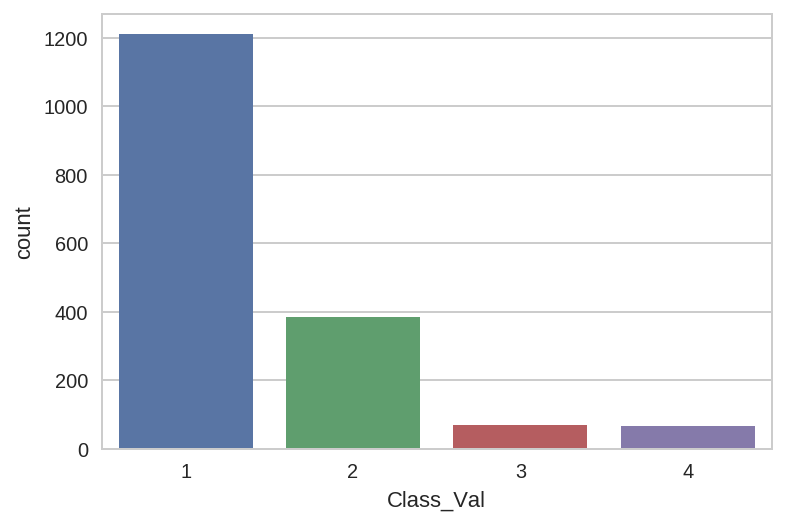

In [8]:
sns.set_style("whitegrid")
sns.countplot(df['Class_Val'])

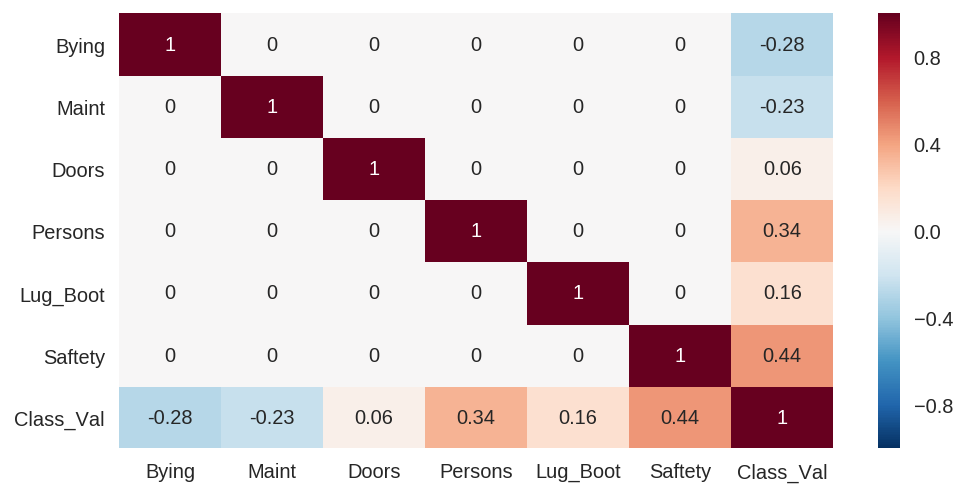

In [9]:
fig = plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot = True)

In [10]:
X = df.values[:,:-1]
y = pd.get_dummies(df['Class_Val']).values
print(X.shape,y.shape)

(1728, 6) (1728, 4)


In [11]:
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1382, 6) (1382, 4) (346, 6) (346, 4)


## 2. Neural Network without Regularization

In [0]:
model_1 = Sequential()
model_1.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=None))
model_1.add(Dense(8, activation='relu',kernel_regularizer=None))
model_1.add(Dense(4, activation='softmax',kernel_regularizer=None))
model_1.compile('rmsprop','categorical_crossentropy',metrics=['accuracy'])

In [13]:
model_1.history = model_1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 887us/step - loss: 0.9551 - acc: 0.5637 - val_loss: 0.7603 - val_acc: 0.7254
Epoch 2/500
1382/1382 [==============================] - 0s 177us/step - loss: 0.7394 - acc: 0.6939 - val_loss: 0.6929 - val_acc: 0.7254
Epoch 3/500
1382/1382 [==============================] - 0s 180us/step - loss: 0.6888 - acc: 0.6939 - val_loss: 0.6693 - val_acc: 0.7254
Epoch 4/500
1382/1382 [==============================] - 0s 169us/step - loss: 0.6538 - acc: 0.6932 - val_loss: 0.6216 - val_acc: 0.7254
Epoch 5/500
1382/1382 [==============================] - 0s 185us/step - loss: 0.6298 - acc: 0.6903 - val_loss: 0.6088 - val_acc: 0.7139
Epoch 6/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.6112 - acc: 0.6845 - val_loss: 0.5943 - val_acc: 0.7023
Epoch 7/500
1382/1382 [==============================] - 0s 203us/step - loss: 0.5976 - acc: 0.6852 - val_loss: 0.5795 - val_acc: 0

1382/1382 [==============================] - 0s 204us/step - loss: 0.5319 - acc: 0.7489 - val_loss: 0.5250 - val_acc: 0.7919
Epoch 16/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.5266 - acc: 0.7670 - val_loss: 0.5207 - val_acc: 0.7514
Epoch 17/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.5197 - acc: 0.7562 - val_loss: 0.5104 - val_acc: 0.7601
Epoch 18/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.5133 - acc: 0.7634 - val_loss: 0.5372 - val_acc: 0.7428
Epoch 19/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.5074 - acc: 0.7670 - val_loss: 0.4984 - val_acc: 0.7601
Epoch 20/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.5033 - acc: 0.7750 - val_loss: 0.5078 - val_acc: 0.7717
Epoch 21/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.4950 - acc: 0.7706 - val_loss: 0.4912 - val_acc: 0.7803
Epoch 22/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 193us/step - loss: 0.4362 - acc: 0.8365 - val_loss: 0.4560 - val_acc: 0.8121
Epoch 31/500
1382/1382 [==============================] - 0s 204us/step - loss: 0.4322 - acc: 0.8379 - val_loss: 0.4255 - val_acc: 0.8382
Epoch 32/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.4188 - acc: 0.8452 - val_loss: 0.4279 - val_acc: 0.8353
Epoch 33/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.4189 - acc: 0.8480 - val_loss: 0.4053 - val_acc: 0.8613
Epoch 34/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.4093 - acc: 0.8502 - val_loss: 0.4062 - val_acc: 0.8613
Epoch 35/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.4031 - acc: 0.8531 - val_loss: 0.3907 - val_acc: 0.8613
Epoch 36/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.3950 - acc: 0.8582 - val_loss: 0.3927 - val_acc: 0.8584
Epoch 37/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 194us/step - loss: 0.3437 - acc: 0.8748 - val_loss: 0.3327 - val_acc: 0.8757
Epoch 46/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.3357 - acc: 0.8799 - val_loss: 0.3640 - val_acc: 0.8526
Epoch 47/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.3316 - acc: 0.8777 - val_loss: 0.3512 - val_acc: 0.8642
Epoch 48/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.3261 - acc: 0.8763 - val_loss: 0.3364 - val_acc: 0.8728
Epoch 49/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.3242 - acc: 0.8770 - val_loss: 0.3161 - val_acc: 0.8873
Epoch 50/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.3196 - acc: 0.8763 - val_loss: 0.3258 - val_acc: 0.8699
Epoch 51/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.3181 - acc: 0.8842 - val_loss: 0.3423 - val_acc: 0.8584
Epoch 52/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 188us/step - loss: 0.2904 - acc: 0.8929 - val_loss: 0.2912 - val_acc: 0.8844
Epoch 61/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.2905 - acc: 0.8915 - val_loss: 0.2884 - val_acc: 0.8931
Epoch 62/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.2872 - acc: 0.8980 - val_loss: 0.3022 - val_acc: 0.8757
Epoch 63/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.2866 - acc: 0.8987 - val_loss: 0.2764 - val_acc: 0.8931
Epoch 64/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.2851 - acc: 0.8987 - val_loss: 0.2813 - val_acc: 0.8902
Epoch 65/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.2806 - acc: 0.9016 - val_loss: 0.3203 - val_acc: 0.8555
Epoch 66/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.2780 - acc: 0.9009 - val_loss: 0.2709 - val_acc: 0.8988
Epoch 67/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 192us/step - loss: 0.2644 - acc: 0.9045 - val_loss: 0.2537 - val_acc: 0.9017
Epoch 76/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.2546 - acc: 0.9088 - val_loss: 0.2526 - val_acc: 0.8988
Epoch 77/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.2521 - acc: 0.9132 - val_loss: 0.2883 - val_acc: 0.8844
Epoch 78/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.2470 - acc: 0.9110 - val_loss: 0.2455 - val_acc: 0.8960
Epoch 79/500
1382/1382 [==============================] - 0s 202us/step - loss: 0.2474 - acc: 0.9096 - val_loss: 0.2446 - val_acc: 0.9017
Epoch 80/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.2434 - acc: 0.9139 - val_loss: 0.2358 - val_acc: 0.8960
Epoch 81/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.2415 - acc: 0.9153 - val_loss: 0.2360 - val_acc: 0.8931
Epoch 82/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 200us/step - loss: 0.2275 - acc: 0.9197 - val_loss: 0.2430 - val_acc: 0.8960
Epoch 91/500
1382/1382 [==============================] - 0s 202us/step - loss: 0.2245 - acc: 0.9190 - val_loss: 0.2249 - val_acc: 0.9046
Epoch 92/500
1382/1382 [==============================] - 0s 204us/step - loss: 0.2227 - acc: 0.9153 - val_loss: 0.2247 - val_acc: 0.9075
Epoch 93/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.2184 - acc: 0.9211 - val_loss: 0.2100 - val_acc: 0.9046
Epoch 94/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.2195 - acc: 0.9161 - val_loss: 0.2643 - val_acc: 0.8988
Epoch 95/500
1382/1382 [==============================] - 0s 203us/step - loss: 0.2193 - acc: 0.9146 - val_loss: 0.2252 - val_acc: 0.9075
Epoch 96/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.2168 - acc: 0.9139 - val_loss: 0.2908 - val_acc: 0.8844
Epoch 97/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 196us/step - loss: 0.2081 - acc: 0.9240 - val_loss: 0.1993 - val_acc: 0.9191
Epoch 106/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.2092 - acc: 0.9204 - val_loss: 0.2196 - val_acc: 0.9133
Epoch 107/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.2062 - acc: 0.9276 - val_loss: 0.2197 - val_acc: 0.9162
Epoch 108/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.2068 - acc: 0.9291 - val_loss: 0.2040 - val_acc: 0.9220
Epoch 109/500
1382/1382 [==============================] - 0s 200us/step - loss: 0.2067 - acc: 0.9269 - val_loss: 0.2295 - val_acc: 0.9104
Epoch 110/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.2053 - acc: 0.9255 - val_loss: 0.2049 - val_acc: 0.9249
Epoch 111/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.2029 - acc: 0.9269 - val_loss: 0.2027 - val_acc: 0.9249
Epoch 112/500
1382/1382 [================

1382/1382 [==============================] - 0s 192us/step - loss: 0.1993 - acc: 0.9255 - val_loss: 0.1953 - val_acc: 0.9191
Epoch 121/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1999 - acc: 0.9276 - val_loss: 0.2126 - val_acc: 0.9133
Epoch 122/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1994 - acc: 0.9233 - val_loss: 0.1916 - val_acc: 0.9306
Epoch 123/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1979 - acc: 0.9262 - val_loss: 0.2010 - val_acc: 0.9220
Epoch 124/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.1971 - acc: 0.9276 - val_loss: 0.1945 - val_acc: 0.9162
Epoch 125/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.1926 - acc: 0.9255 - val_loss: 0.1925 - val_acc: 0.9306
Epoch 126/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1952 - acc: 0.9233 - val_loss: 0.2392 - val_acc: 0.8988
Epoch 127/500
1382/1382 [================

1382/1382 [==============================] - 0s 201us/step - loss: 0.1922 - acc: 0.9269 - val_loss: 0.2073 - val_acc: 0.9191
Epoch 136/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1908 - acc: 0.9298 - val_loss: 0.2080 - val_acc: 0.9104
Epoch 137/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1904 - acc: 0.9313 - val_loss: 0.1795 - val_acc: 0.9335
Epoch 138/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1910 - acc: 0.9298 - val_loss: 0.1844 - val_acc: 0.9306
Epoch 139/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.1900 - acc: 0.9305 - val_loss: 0.1815 - val_acc: 0.9364
Epoch 140/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.1899 - acc: 0.9276 - val_loss: 0.1880 - val_acc: 0.9335
Epoch 141/500
1382/1382 [==============================] - 0s 200us/step - loss: 0.1874 - acc: 0.9284 - val_loss: 0.1841 - val_acc: 0.9335
Epoch 142/500
1382/1382 [================

1382/1382 [==============================] - 0s 195us/step - loss: 0.1862 - acc: 0.9291 - val_loss: 0.1770 - val_acc: 0.9335
Epoch 151/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1880 - acc: 0.9291 - val_loss: 0.1759 - val_acc: 0.9335
Epoch 152/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.1857 - acc: 0.9269 - val_loss: 0.1869 - val_acc: 0.9277
Epoch 153/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1847 - acc: 0.9291 - val_loss: 0.1732 - val_acc: 0.9335
Epoch 154/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1849 - acc: 0.9320 - val_loss: 0.1791 - val_acc: 0.9277
Epoch 155/500
1382/1382 [==============================] - 0s 202us/step - loss: 0.1836 - acc: 0.9342 - val_loss: 0.1800 - val_acc: 0.9306
Epoch 156/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1851 - acc: 0.9284 - val_loss: 0.1692 - val_acc: 0.9393
Epoch 157/500
1382/1382 [================

Epoch 165/500
1382/1382 [==============================] - 0s 204us/step - loss: 0.1831 - acc: 0.9356 - val_loss: 0.1702 - val_acc: 0.9393
Epoch 166/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1784 - acc: 0.9334 - val_loss: 0.1670 - val_acc: 0.9306
Epoch 167/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1798 - acc: 0.9356 - val_loss: 0.1808 - val_acc: 0.9335
Epoch 168/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1767 - acc: 0.9356 - val_loss: 0.1780 - val_acc: 0.9335
Epoch 169/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1795 - acc: 0.9378 - val_loss: 0.1805 - val_acc: 0.9364
Epoch 170/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.1809 - acc: 0.9320 - val_loss: 0.1760 - val_acc: 0.9249
Epoch 171/500
1382/1382 [==============================] - 0s 200us/step - loss: 0.1761 - acc: 0.9392 - val_loss: 0.1720 - val_acc: 0.9393
Epoch 172/500
1382/1382 [==

1382/1382 [==============================] - 0s 202us/step - loss: 0.1750 - acc: 0.9320 - val_loss: 0.1597 - val_acc: 0.9393
Epoch 181/500
1382/1382 [==============================] - 0s 203us/step - loss: 0.1760 - acc: 0.9378 - val_loss: 0.1602 - val_acc: 0.9393
Epoch 182/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1768 - acc: 0.9356 - val_loss: 0.1622 - val_acc: 0.9422
Epoch 183/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1768 - acc: 0.9356 - val_loss: 0.1686 - val_acc: 0.9335
Epoch 184/500
1382/1382 [==============================] - 0s 203us/step - loss: 0.1726 - acc: 0.9378 - val_loss: 0.1776 - val_acc: 0.9306
Epoch 185/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1754 - acc: 0.9385 - val_loss: 0.1834 - val_acc: 0.9277
Epoch 186/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1740 - acc: 0.9378 - val_loss: 0.1693 - val_acc: 0.9277
Epoch 187/500
1382/1382 [================

1382/1382 [==============================] - 0s 198us/step - loss: 0.1723 - acc: 0.9334 - val_loss: 0.1609 - val_acc: 0.9393
Epoch 196/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.1715 - acc: 0.9399 - val_loss: 0.1646 - val_acc: 0.9364
Epoch 197/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1729 - acc: 0.9320 - val_loss: 0.1598 - val_acc: 0.9335
Epoch 198/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1711 - acc: 0.9399 - val_loss: 0.1651 - val_acc: 0.9335
Epoch 199/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.1710 - acc: 0.9392 - val_loss: 0.1548 - val_acc: 0.9364
Epoch 200/500
1382/1382 [==============================] - 0s 200us/step - loss: 0.1694 - acc: 0.9378 - val_loss: 0.1581 - val_acc: 0.9306
Epoch 201/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1727 - acc: 0.9363 - val_loss: 0.1695 - val_acc: 0.9249
Epoch 202/500
1382/1382 [================

1382/1382 [==============================] - 0s 187us/step - loss: 0.1682 - acc: 0.9349 - val_loss: 0.1562 - val_acc: 0.9393
Epoch 211/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1660 - acc: 0.9414 - val_loss: 0.1776 - val_acc: 0.9306
Epoch 212/500
1382/1382 [==============================] - 0s 188us/step - loss: 0.1676 - acc: 0.9370 - val_loss: 0.1767 - val_acc: 0.9277
Epoch 213/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1652 - acc: 0.9414 - val_loss: 0.1735 - val_acc: 0.9249
Epoch 214/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1657 - acc: 0.9363 - val_loss: 0.1703 - val_acc: 0.9306
Epoch 215/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1712 - acc: 0.9349 - val_loss: 0.1531 - val_acc: 0.9393
Epoch 216/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1692 - acc: 0.9399 - val_loss: 0.1590 - val_acc: 0.9422
Epoch 217/500
1382/1382 [================

1382/1382 [==============================] - 0s 195us/step - loss: 0.1651 - acc: 0.9421 - val_loss: 0.1741 - val_acc: 0.9335
Epoch 226/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1622 - acc: 0.9428 - val_loss: 0.1451 - val_acc: 0.9451
Epoch 227/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.1653 - acc: 0.9399 - val_loss: 0.1528 - val_acc: 0.9364
Epoch 228/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1675 - acc: 0.9363 - val_loss: 0.1557 - val_acc: 0.9422
Epoch 229/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1666 - acc: 0.9378 - val_loss: 0.1619 - val_acc: 0.9335
Epoch 230/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.1646 - acc: 0.9392 - val_loss: 0.1497 - val_acc: 0.9364
Epoch 231/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.1621 - acc: 0.9414 - val_loss: 0.1719 - val_acc: 0.9364
Epoch 232/500
1382/1382 [================

1382/1382 [==============================] - 0s 193us/step - loss: 0.1615 - acc: 0.9385 - val_loss: 0.1519 - val_acc: 0.9451
Epoch 241/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1609 - acc: 0.9392 - val_loss: 0.1495 - val_acc: 0.9509
Epoch 242/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1604 - acc: 0.9370 - val_loss: 0.1545 - val_acc: 0.9335
Epoch 243/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1604 - acc: 0.9443 - val_loss: 0.1607 - val_acc: 0.9306
Epoch 244/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1615 - acc: 0.9407 - val_loss: 0.1455 - val_acc: 0.9393
Epoch 245/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.1611 - acc: 0.9407 - val_loss: 0.1418 - val_acc: 0.9451
Epoch 246/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1599 - acc: 0.9436 - val_loss: 0.1575 - val_acc: 0.9393
Epoch 247/500
1382/1382 [================

1382/1382 [==============================] - 0s 193us/step - loss: 0.1590 - acc: 0.9436 - val_loss: 0.1578 - val_acc: 0.9393
Epoch 256/500
1382/1382 [==============================] - 0s 202us/step - loss: 0.1540 - acc: 0.9421 - val_loss: 0.1608 - val_acc: 0.9393
Epoch 257/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.1587 - acc: 0.9407 - val_loss: 0.1412 - val_acc: 0.9451
Epoch 258/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1579 - acc: 0.9414 - val_loss: 0.1678 - val_acc: 0.9335
Epoch 259/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1588 - acc: 0.9443 - val_loss: 0.1591 - val_acc: 0.9393
Epoch 260/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1579 - acc: 0.9421 - val_loss: 0.1524 - val_acc: 0.9422
Epoch 261/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1569 - acc: 0.9414 - val_loss: 0.1572 - val_acc: 0.9335
Epoch 262/500
1382/1382 [================

1382/1382 [==============================] - 0s 199us/step - loss: 0.1562 - acc: 0.9428 - val_loss: 0.1637 - val_acc: 0.9306
Epoch 271/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1536 - acc: 0.9443 - val_loss: 0.1414 - val_acc: 0.9422
Epoch 272/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.1550 - acc: 0.9399 - val_loss: 0.1558 - val_acc: 0.9335
Epoch 273/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1554 - acc: 0.9414 - val_loss: 0.1406 - val_acc: 0.9451
Epoch 274/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1530 - acc: 0.9450 - val_loss: 0.1569 - val_acc: 0.9364
Epoch 275/500
1382/1382 [==============================] - 0s 204us/step - loss: 0.1550 - acc: 0.9436 - val_loss: 0.1408 - val_acc: 0.9451
Epoch 276/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1548 - acc: 0.9436 - val_loss: 0.1626 - val_acc: 0.9306
Epoch 277/500
1382/1382 [================

1382/1382 [==============================] - 0s 198us/step - loss: 0.1543 - acc: 0.9378 - val_loss: 0.1451 - val_acc: 0.9335
Epoch 286/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1524 - acc: 0.9436 - val_loss: 0.1395 - val_acc: 0.9422
Epoch 287/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1538 - acc: 0.9450 - val_loss: 0.1655 - val_acc: 0.9306
Epoch 288/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1511 - acc: 0.9443 - val_loss: 0.1746 - val_acc: 0.9162
Epoch 289/500
1382/1382 [==============================] - 0s 187us/step - loss: 0.1514 - acc: 0.9421 - val_loss: 0.1596 - val_acc: 0.9306
Epoch 290/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1525 - acc: 0.9436 - val_loss: 0.1538 - val_acc: 0.9364
Epoch 291/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1497 - acc: 0.9428 - val_loss: 0.1772 - val_acc: 0.9220
Epoch 292/500
1382/1382 [================

1382/1382 [==============================] - 0s 195us/step - loss: 0.1489 - acc: 0.9472 - val_loss: 0.1494 - val_acc: 0.9335
Epoch 301/500
1382/1382 [==============================] - 0s 202us/step - loss: 0.1486 - acc: 0.9443 - val_loss: 0.1307 - val_acc: 0.9509
Epoch 302/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1495 - acc: 0.9465 - val_loss: 0.1350 - val_acc: 0.9451
Epoch 303/500
1382/1382 [==============================] - 0s 203us/step - loss: 0.1484 - acc: 0.9450 - val_loss: 0.1416 - val_acc: 0.9422
Epoch 304/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1477 - acc: 0.9465 - val_loss: 0.1594 - val_acc: 0.9306
Epoch 305/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1454 - acc: 0.9508 - val_loss: 0.1630 - val_acc: 0.9277
Epoch 306/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1512 - acc: 0.9407 - val_loss: 0.1410 - val_acc: 0.9393
Epoch 307/500
1382/1382 [================

1382/1382 [==============================] - 0s 193us/step - loss: 0.1462 - acc: 0.9465 - val_loss: 0.1379 - val_acc: 0.9422
Epoch 316/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1473 - acc: 0.9428 - val_loss: 0.1397 - val_acc: 0.9422
Epoch 317/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1466 - acc: 0.9436 - val_loss: 0.1465 - val_acc: 0.9422
Epoch 318/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1458 - acc: 0.9479 - val_loss: 0.1519 - val_acc: 0.9364
Epoch 319/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1455 - acc: 0.9436 - val_loss: 0.1359 - val_acc: 0.9480
Epoch 320/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1457 - acc: 0.9472 - val_loss: 0.1582 - val_acc: 0.9306
Epoch 321/500
1382/1382 [==============================] - 0s 187us/step - loss: 0.1444 - acc: 0.9457 - val_loss: 0.1398 - val_acc: 0.9422
Epoch 322/500
1382/1382 [================

1382/1382 [==============================] - 0s 195us/step - loss: 0.1423 - acc: 0.9493 - val_loss: 0.1573 - val_acc: 0.9364
Epoch 331/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1422 - acc: 0.9472 - val_loss: 0.1674 - val_acc: 0.9306
Epoch 332/500
1382/1382 [==============================] - 0s 188us/step - loss: 0.1443 - acc: 0.9479 - val_loss: 0.1558 - val_acc: 0.9393
Epoch 333/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1433 - acc: 0.9465 - val_loss: 0.1436 - val_acc: 0.9422
Epoch 334/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1421 - acc: 0.9450 - val_loss: 0.1450 - val_acc: 0.9393
Epoch 335/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1437 - acc: 0.9465 - val_loss: 0.1609 - val_acc: 0.9277
Epoch 336/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1427 - acc: 0.9472 - val_loss: 0.1351 - val_acc: 0.9422
Epoch 337/500
1382/1382 [================

1382/1382 [==============================] - 0s 184us/step - loss: 0.1405 - acc: 0.9508 - val_loss: 0.1567 - val_acc: 0.9306
Epoch 346/500
1382/1382 [==============================] - 0s 165us/step - loss: 0.1401 - acc: 0.9522 - val_loss: 0.1417 - val_acc: 0.9335
Epoch 347/500
1382/1382 [==============================] - 0s 167us/step - loss: 0.1422 - acc: 0.9443 - val_loss: 0.1648 - val_acc: 0.9335
Epoch 348/500
1382/1382 [==============================] - 0s 166us/step - loss: 0.1402 - acc: 0.9493 - val_loss: 0.1365 - val_acc: 0.9393
Epoch 349/500
1382/1382 [==============================] - 0s 166us/step - loss: 0.1426 - acc: 0.9479 - val_loss: 0.1637 - val_acc: 0.9306
Epoch 350/500
1382/1382 [==============================] - 0s 162us/step - loss: 0.1414 - acc: 0.9493 - val_loss: 0.1327 - val_acc: 0.9451
Epoch 351/500
1382/1382 [==============================] - 0s 161us/step - loss: 0.1411 - acc: 0.9443 - val_loss: 0.1387 - val_acc: 0.9422
Epoch 352/500
1382/1382 [================

1382/1382 [==============================] - 0s 189us/step - loss: 0.1386 - acc: 0.9465 - val_loss: 0.1402 - val_acc: 0.9393
Epoch 361/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1371 - acc: 0.9501 - val_loss: 0.1792 - val_acc: 0.9249
Epoch 362/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1386 - acc: 0.9457 - val_loss: 0.1533 - val_acc: 0.9306
Epoch 363/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.1387 - acc: 0.9515 - val_loss: 0.1381 - val_acc: 0.9335
Epoch 364/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1370 - acc: 0.9486 - val_loss: 0.1858 - val_acc: 0.9306
Epoch 365/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1379 - acc: 0.9522 - val_loss: 0.1339 - val_acc: 0.9480
Epoch 366/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.1348 - acc: 0.9530 - val_loss: 0.1916 - val_acc: 0.9277
Epoch 367/500
1382/1382 [================

1382/1382 [==============================] - 0s 200us/step - loss: 0.1359 - acc: 0.9508 - val_loss: 0.1439 - val_acc: 0.9306
Epoch 376/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1378 - acc: 0.9465 - val_loss: 0.1340 - val_acc: 0.9422
Epoch 377/500
1382/1382 [==============================] - 0s 187us/step - loss: 0.1361 - acc: 0.9493 - val_loss: 0.1470 - val_acc: 0.9364
Epoch 378/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1353 - acc: 0.9508 - val_loss: 0.1344 - val_acc: 0.9422
Epoch 379/500
1382/1382 [==============================] - 0s 186us/step - loss: 0.1328 - acc: 0.9530 - val_loss: 0.1697 - val_acc: 0.9277
Epoch 380/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1352 - acc: 0.9522 - val_loss: 0.1319 - val_acc: 0.9422
Epoch 381/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1367 - acc: 0.9493 - val_loss: 0.1368 - val_acc: 0.9451
Epoch 382/500
1382/1382 [================

1382/1382 [==============================] - 0s 190us/step - loss: 0.1365 - acc: 0.9486 - val_loss: 0.1429 - val_acc: 0.9393
Epoch 391/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1352 - acc: 0.9479 - val_loss: 0.1328 - val_acc: 0.9509
Epoch 392/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1361 - acc: 0.9508 - val_loss: 0.1485 - val_acc: 0.9335
Epoch 393/500
1382/1382 [==============================] - 0s 204us/step - loss: 0.1325 - acc: 0.9551 - val_loss: 0.1343 - val_acc: 0.9364
Epoch 394/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1321 - acc: 0.9508 - val_loss: 0.1461 - val_acc: 0.9364
Epoch 395/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1350 - acc: 0.9443 - val_loss: 0.1362 - val_acc: 0.9393
Epoch 396/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1318 - acc: 0.9501 - val_loss: 0.1485 - val_acc: 0.9335
Epoch 397/500
1382/1382 [================

Epoch 405/500
1382/1382 [==============================] - 0s 186us/step - loss: 0.1317 - acc: 0.9515 - val_loss: 0.1449 - val_acc: 0.9364
Epoch 406/500
1382/1382 [==============================] - 0s 184us/step - loss: 0.1299 - acc: 0.9551 - val_loss: 0.1568 - val_acc: 0.9364
Epoch 407/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1326 - acc: 0.9515 - val_loss: 0.1314 - val_acc: 0.9451
Epoch 408/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1312 - acc: 0.9508 - val_loss: 0.1307 - val_acc: 0.9566
Epoch 409/500
1382/1382 [==============================] - 0s 188us/step - loss: 0.1330 - acc: 0.9501 - val_loss: 0.1409 - val_acc: 0.9277
Epoch 410/500
1382/1382 [==============================] - 0s 200us/step - loss: 0.1313 - acc: 0.9522 - val_loss: 0.1559 - val_acc: 0.9393
Epoch 411/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1312 - acc: 0.9537 - val_loss: 0.1872 - val_acc: 0.9306
Epoch 412/500
1382/1382 [==

1382/1382 [==============================] - 0s 188us/step - loss: 0.1305 - acc: 0.9501 - val_loss: 0.1610 - val_acc: 0.9220
Epoch 421/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1312 - acc: 0.9501 - val_loss: 0.1397 - val_acc: 0.9480
Epoch 422/500
1382/1382 [==============================] - 0s 200us/step - loss: 0.1302 - acc: 0.9544 - val_loss: 0.1329 - val_acc: 0.9393
Epoch 423/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1303 - acc: 0.9515 - val_loss: 0.1361 - val_acc: 0.9451
Epoch 424/500
1382/1382 [==============================] - 0s 188us/step - loss: 0.1308 - acc: 0.9515 - val_loss: 0.1568 - val_acc: 0.9364
Epoch 425/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1325 - acc: 0.9508 - val_loss: 0.1424 - val_acc: 0.9364
Epoch 426/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1294 - acc: 0.9530 - val_loss: 0.1403 - val_acc: 0.9451
Epoch 427/500
1382/1382 [================

1382/1382 [==============================] - 0s 184us/step - loss: 0.1318 - acc: 0.9501 - val_loss: 0.1381 - val_acc: 0.9364
Epoch 436/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.1307 - acc: 0.9522 - val_loss: 0.1464 - val_acc: 0.9393
Epoch 437/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1282 - acc: 0.9537 - val_loss: 0.1615 - val_acc: 0.9306
Epoch 438/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1278 - acc: 0.9515 - val_loss: 0.1576 - val_acc: 0.9335
Epoch 439/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1274 - acc: 0.9515 - val_loss: 0.1469 - val_acc: 0.9364
Epoch 440/500
1382/1382 [==============================] - 0s 200us/step - loss: 0.1289 - acc: 0.9522 - val_loss: 0.1332 - val_acc: 0.9509
Epoch 441/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1278 - acc: 0.9530 - val_loss: 0.1460 - val_acc: 0.9393
Epoch 442/500
1382/1382 [================

1382/1382 [==============================] - 0s 193us/step - loss: 0.1269 - acc: 0.9537 - val_loss: 0.1792 - val_acc: 0.9162
Epoch 451/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1258 - acc: 0.9493 - val_loss: 0.1543 - val_acc: 0.9335
Epoch 452/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1281 - acc: 0.9559 - val_loss: 0.1363 - val_acc: 0.9422
Epoch 453/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.1278 - acc: 0.9493 - val_loss: 0.1652 - val_acc: 0.9335
Epoch 454/500
1382/1382 [==============================] - 0s 194us/step - loss: 0.1278 - acc: 0.9537 - val_loss: 0.1482 - val_acc: 0.9364
Epoch 455/500
1382/1382 [==============================] - 0s 186us/step - loss: 0.1244 - acc: 0.9530 - val_loss: 0.1931 - val_acc: 0.9220
Epoch 456/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1287 - acc: 0.9522 - val_loss: 0.1349 - val_acc: 0.9393
Epoch 457/500
1382/1382 [================

1382/1382 [==============================] - 0s 192us/step - loss: 0.1236 - acc: 0.9580 - val_loss: 0.1332 - val_acc: 0.9451
Epoch 466/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1262 - acc: 0.9573 - val_loss: 0.1312 - val_acc: 0.9422
Epoch 467/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1227 - acc: 0.9573 - val_loss: 0.1750 - val_acc: 0.9249
Epoch 468/500
1382/1382 [==============================] - 0s 203us/step - loss: 0.1236 - acc: 0.9522 - val_loss: 0.1310 - val_acc: 0.9451
Epoch 469/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1231 - acc: 0.9566 - val_loss: 0.1460 - val_acc: 0.9335
Epoch 470/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1247 - acc: 0.9537 - val_loss: 0.1806 - val_acc: 0.9335
Epoch 471/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1275 - acc: 0.9544 - val_loss: 0.1257 - val_acc: 0.9480
Epoch 472/500
1382/1382 [================

1382/1382 [==============================] - 0s 196us/step - loss: 0.1233 - acc: 0.9559 - val_loss: 0.1296 - val_acc: 0.9451
Epoch 481/500
1382/1382 [==============================] - 0s 192us/step - loss: 0.1249 - acc: 0.9551 - val_loss: 0.1480 - val_acc: 0.9364
Epoch 482/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.1231 - acc: 0.9522 - val_loss: 0.1304 - val_acc: 0.9451
Epoch 483/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1230 - acc: 0.9580 - val_loss: 0.1421 - val_acc: 0.9393
Epoch 484/500
1382/1382 [==============================] - 0s 191us/step - loss: 0.1217 - acc: 0.9566 - val_loss: 0.1414 - val_acc: 0.9480
Epoch 485/500
1382/1382 [==============================] - 0s 186us/step - loss: 0.1253 - acc: 0.9551 - val_loss: 0.1282 - val_acc: 0.9538
Epoch 486/500
1382/1382 [==============================] - 0s 186us/step - loss: 0.1245 - acc: 0.9551 - val_loss: 0.1305 - val_acc: 0.9480
Epoch 487/500
1382/1382 [================

1382/1382 [==============================] - 0s 191us/step - loss: 0.1219 - acc: 0.9588 - val_loss: 0.1320 - val_acc: 0.9509
Epoch 496/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.1221 - acc: 0.9551 - val_loss: 0.1381 - val_acc: 0.9422
Epoch 497/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1189 - acc: 0.9588 - val_loss: 0.1702 - val_acc: 0.9393
Epoch 498/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.1189 - acc: 0.9530 - val_loss: 0.1416 - val_acc: 0.9393
Epoch 499/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.1220 - acc: 0.9551 - val_loss: 0.1281 - val_acc: 0.9451
Epoch 500/500
1382/1382 [==============================] - 0s 189us/step - loss: 0.1224 - acc: 0.9559 - val_loss: 0.1707 - val_acc: 0.9277


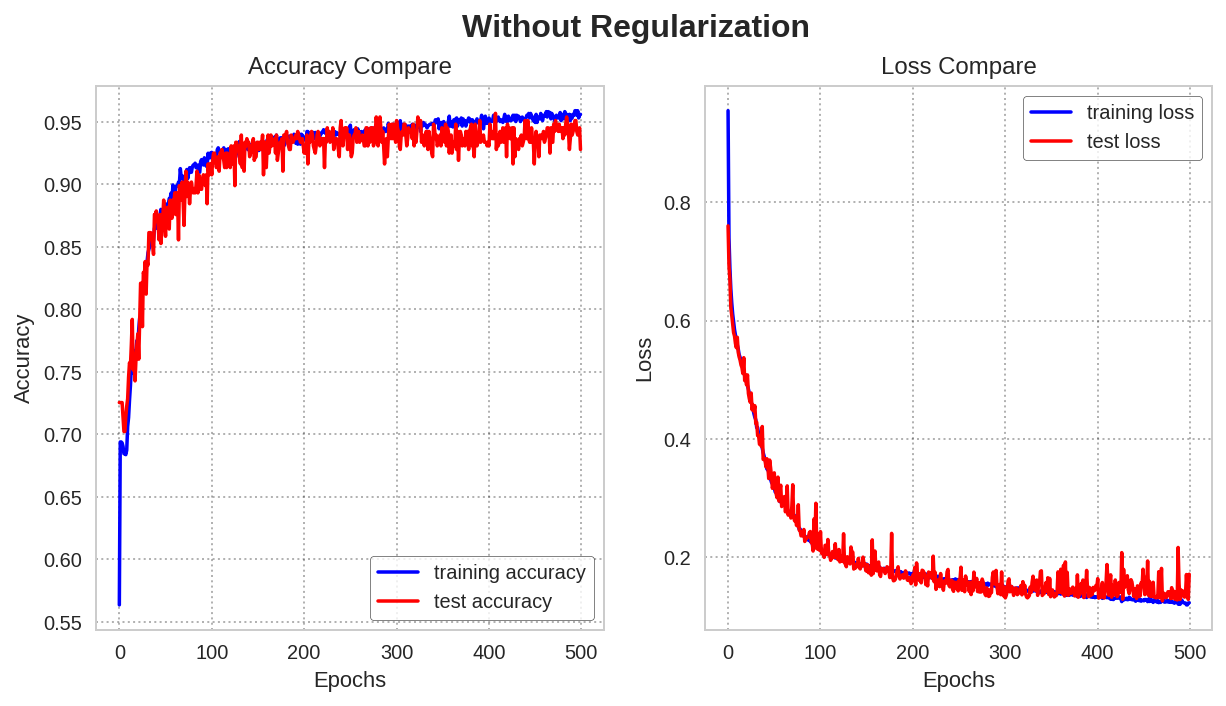

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_1.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_1.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_1.history.history['loss'],color='b',label='training loss')
ax2.plot(model_1.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Without Regularization',fontsize=16, fontweight='bold')
plt.show()

In [0]:
model_1_train_score = model_1.evaluate(X_train,y_train,verbose=0)

In [0]:
model_1_score = model_1.evaluate(X_test,y_test,verbose=0)

In [17]:
print("Train loss: ",model_1_train_score[0])
print("Test loss: ",model_1_score[0])
print("Train accuracy: %.4f%%"% (model_1_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_1_score[1]*100))


Train loss:  0.12429978574495412
Test loss:  0.17074658131668333
Train accuracy: 95.2967%
Test accuracy: 92.7746%


In [18]:
y_pred_class = model_1.predict_classes(X_test,verbose=0)
y_test_class = np.argmax(y_test,axis=1)
print(classification_report(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97       251
          1       0.76      0.95      0.85        64
          2       0.71      0.92      0.80        13
          3       1.00      0.61      0.76        18

avg / total       0.94      0.93      0.93       346



In [0]:
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

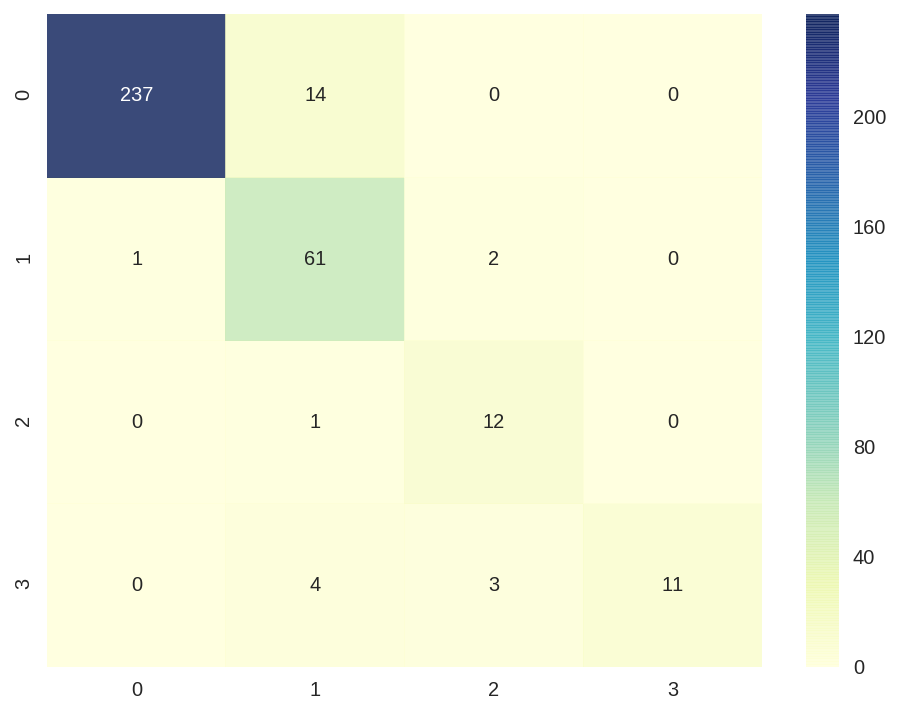

In [20]:
plot_confusion_matrix(model_1, X_test, y_test_class)

## 3. Neural Network with L2 Regularization $\lambda=0.01$

In [0]:
reg_2 = regularizers.l2(l=0.01)
model_2 = Sequential()
model_2.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=reg_2))
model_2.add(Dense(8, activation='relu',kernel_regularizer=reg_2))
model_2.add(Dense(4, activation='softmax',kernel_regularizer=reg_2))
model_2.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [22]:
model_2.history = model_2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 392us/step - loss: 1.4815 - acc: 0.4957 - val_loss: 1.1343 - val_acc: 0.7254
Epoch 2/500
1382/1382 [==============================] - 0s 200us/step - loss: 1.0823 - acc: 0.6939 - val_loss: 1.0540 - val_acc: 0.7254
Epoch 3/500
1382/1382 [==============================] - 0s 200us/step - loss: 1.0130 - acc: 0.6990 - val_loss: 1.0107 - val_acc: 0.7370
Epoch 4/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.9626 - acc: 0.6983 - val_loss: 0.9464 - val_acc: 0.7341
Epoch 5/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.9153 - acc: 0.6932 - val_loss: 0.8910 - val_acc: 0.7283
Epoch 6/500
1382/1382 [==============================] - 0s 193us/step - loss: 0.8779 - acc: 0.7026 - val_loss: 0.8614 - val_acc: 0.7225
Epoch 7/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.8458 - acc: 0.7033 - val_loss: 0.8301 - val_acc: 0

Epoch 15/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.7239 - acc: 0.7337 - val_loss: 0.7218 - val_acc: 0.7486
Epoch 16/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.7151 - acc: 0.7381 - val_loss: 0.7062 - val_acc: 0.7514
Epoch 17/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.7059 - acc: 0.7395 - val_loss: 0.7059 - val_acc: 0.7601
Epoch 18/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.7014 - acc: 0.7525 - val_loss: 0.6864 - val_acc: 0.7543
Epoch 19/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.6922 - acc: 0.7417 - val_loss: 0.6762 - val_acc: 0.7572
Epoch 20/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.6866 - acc: 0.7569 - val_loss: 0.6688 - val_acc: 0.7543
Epoch 21/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.6861 - acc: 0.7410 - val_loss: 0.6659 - val_acc: 0.7630
Epoch 22/500
1382/1382 [==========

Epoch 29/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.6277 - acc: 0.7902 - val_loss: 0.6136 - val_acc: 0.7803
Epoch 30/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.6205 - acc: 0.7880 - val_loss: 0.6039 - val_acc: 0.7890
Epoch 31/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.6130 - acc: 0.7923 - val_loss: 0.5961 - val_acc: 0.7919
Epoch 32/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.6080 - acc: 0.7952 - val_loss: 0.5935 - val_acc: 0.7977
Epoch 33/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.6008 - acc: 0.7988 - val_loss: 0.5873 - val_acc: 0.8035
Epoch 34/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.5953 - acc: 0.8054 - val_loss: 0.5883 - val_acc: 0.8035
Epoch 35/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.5903 - acc: 0.8032 - val_loss: 0.6012 - val_acc: 0.7948
Epoch 36/500
1382/1382 [==========

1382/1382 [==============================] - 0s 229us/step - loss: 0.5529 - acc: 0.8357 - val_loss: 0.5344 - val_acc: 0.8410
Epoch 44/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.5476 - acc: 0.8423 - val_loss: 0.5320 - val_acc: 0.8439
Epoch 45/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.5411 - acc: 0.8459 - val_loss: 0.5250 - val_acc: 0.8468
Epoch 46/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.5363 - acc: 0.8459 - val_loss: 0.5295 - val_acc: 0.8497
Epoch 47/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.5350 - acc: 0.8415 - val_loss: 0.5217 - val_acc: 0.8555
Epoch 48/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.5322 - acc: 0.8524 - val_loss: 0.5199 - val_acc: 0.8410
Epoch 49/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.5288 - acc: 0.8488 - val_loss: 0.5123 - val_acc: 0.8468
Epoch 50/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 242us/step - loss: 0.5120 - acc: 0.8625 - val_loss: 0.5020 - val_acc: 0.8671
Epoch 58/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.5101 - acc: 0.8589 - val_loss: 0.5076 - val_acc: 0.8728
Epoch 59/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.5105 - acc: 0.8669 - val_loss: 0.4944 - val_acc: 0.8613
Epoch 60/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.5079 - acc: 0.8625 - val_loss: 0.5018 - val_acc: 0.8728
Epoch 61/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.5088 - acc: 0.8618 - val_loss: 0.4957 - val_acc: 0.8815
Epoch 62/500
1382/1382 [==============================] - 0s 247us/step - loss: 0.5054 - acc: 0.8654 - val_loss: 0.4920 - val_acc: 0.8584
Epoch 63/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.5027 - acc: 0.8690 - val_loss: 0.4915 - val_acc: 0.8642
Epoch 64/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 241us/step - loss: 0.4987 - acc: 0.8676 - val_loss: 0.4830 - val_acc: 0.8555
Epoch 72/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4965 - acc: 0.8661 - val_loss: 0.4928 - val_acc: 0.8786
Epoch 73/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4933 - acc: 0.8698 - val_loss: 0.4882 - val_acc: 0.8815
Epoch 74/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4921 - acc: 0.8748 - val_loss: 0.4872 - val_acc: 0.8815
Epoch 75/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.4916 - acc: 0.8698 - val_loss: 0.4841 - val_acc: 0.8844
Epoch 76/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.4909 - acc: 0.8748 - val_loss: 0.4813 - val_acc: 0.8815
Epoch 77/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4906 - acc: 0.8705 - val_loss: 0.4798 - val_acc: 0.8699
Epoch 78/500
1382/1382 [=======================

Epoch 85/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4849 - acc: 0.8763 - val_loss: 0.4855 - val_acc: 0.8902
Epoch 86/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4878 - acc: 0.8792 - val_loss: 0.4744 - val_acc: 0.8902
Epoch 87/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4929 - acc: 0.8799 - val_loss: 0.4801 - val_acc: 0.8931
Epoch 88/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4835 - acc: 0.8792 - val_loss: 0.4781 - val_acc: 0.9017
Epoch 89/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4832 - acc: 0.8806 - val_loss: 0.4816 - val_acc: 0.8931
Epoch 90/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4828 - acc: 0.8849 - val_loss: 0.4743 - val_acc: 0.8902
Epoch 91/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4832 - acc: 0.8777 - val_loss: 0.4759 - val_acc: 0.8931
Epoch 92/500
1382/1382 [==========

Epoch 99/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4814 - acc: 0.8828 - val_loss: 0.4727 - val_acc: 0.8786
Epoch 100/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4820 - acc: 0.8784 - val_loss: 0.4682 - val_acc: 0.8960
Epoch 101/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4779 - acc: 0.8828 - val_loss: 0.4718 - val_acc: 0.9017
Epoch 102/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4772 - acc: 0.8835 - val_loss: 0.4770 - val_acc: 0.8873
Epoch 103/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4804 - acc: 0.8784 - val_loss: 0.4681 - val_acc: 0.8988
Epoch 104/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4770 - acc: 0.8835 - val_loss: 0.4735 - val_acc: 0.8960
Epoch 105/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4822 - acc: 0.8806 - val_loss: 0.4752 - val_acc: 0.8931
Epoch 106/500
1382/1382 [===

1382/1382 [==============================] - 0s 240us/step - loss: 0.4780 - acc: 0.8763 - val_loss: 0.4719 - val_acc: 0.8960
Epoch 114/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4753 - acc: 0.8799 - val_loss: 0.4688 - val_acc: 0.8960
Epoch 115/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4739 - acc: 0.8864 - val_loss: 0.4664 - val_acc: 0.8960
Epoch 116/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4742 - acc: 0.8828 - val_loss: 0.4634 - val_acc: 0.8960
Epoch 117/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4765 - acc: 0.8792 - val_loss: 0.4727 - val_acc: 0.8902
Epoch 118/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4737 - acc: 0.8828 - val_loss: 0.4662 - val_acc: 0.8931
Epoch 119/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.4749 - acc: 0.8864 - val_loss: 0.4641 - val_acc: 0.8931
Epoch 120/500
1382/1382 [================

Epoch 127/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4719 - acc: 0.8806 - val_loss: 0.4702 - val_acc: 0.8873
Epoch 128/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4745 - acc: 0.8799 - val_loss: 0.4626 - val_acc: 0.8902
Epoch 129/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.4774 - acc: 0.8784 - val_loss: 0.4636 - val_acc: 0.8931
Epoch 130/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4741 - acc: 0.8842 - val_loss: 0.4640 - val_acc: 0.8960
Epoch 131/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4702 - acc: 0.8813 - val_loss: 0.4718 - val_acc: 0.8902
Epoch 132/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4727 - acc: 0.8777 - val_loss: 0.4759 - val_acc: 0.8815
Epoch 133/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4704 - acc: 0.8849 - val_loss: 0.4626 - val_acc: 0.8902
Epoch 134/500
1382/1382 [==

1382/1382 [==============================] - 0s 236us/step - loss: 0.4687 - acc: 0.8871 - val_loss: 0.4622 - val_acc: 0.8844
Epoch 141/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.4684 - acc: 0.8806 - val_loss: 0.4775 - val_acc: 0.8815
Epoch 142/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4700 - acc: 0.8828 - val_loss: 0.4598 - val_acc: 0.8757
Epoch 143/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4694 - acc: 0.8842 - val_loss: 0.4609 - val_acc: 0.8815
Epoch 144/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4670 - acc: 0.8835 - val_loss: 0.4649 - val_acc: 0.8960
Epoch 145/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4676 - acc: 0.8842 - val_loss: 0.4697 - val_acc: 0.8873
Epoch 146/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4680 - acc: 0.8813 - val_loss: 0.4631 - val_acc: 0.8931
Epoch 147/500
1382/1382 [================

Epoch 154/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4650 - acc: 0.8842 - val_loss: 0.4585 - val_acc: 0.8873
Epoch 155/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4697 - acc: 0.8828 - val_loss: 0.4647 - val_acc: 0.8902
Epoch 156/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4640 - acc: 0.8813 - val_loss: 0.4642 - val_acc: 0.8902
Epoch 157/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.4645 - acc: 0.8864 - val_loss: 0.4846 - val_acc: 0.8786
Epoch 158/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4675 - acc: 0.8878 - val_loss: 0.4661 - val_acc: 0.8873
Epoch 159/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4637 - acc: 0.8900 - val_loss: 0.4579 - val_acc: 0.8931
Epoch 160/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.4681 - acc: 0.8777 - val_loss: 0.4678 - val_acc: 0.8844
Epoch 161/500
1382/1382 [==

1382/1382 [==============================] - 0s 237us/step - loss: 0.4643 - acc: 0.8842 - val_loss: 0.4590 - val_acc: 0.8902
Epoch 168/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4655 - acc: 0.8813 - val_loss: 0.4584 - val_acc: 0.8902
Epoch 169/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.4630 - acc: 0.8806 - val_loss: 0.4736 - val_acc: 0.8815
Epoch 170/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4678 - acc: 0.8871 - val_loss: 0.4599 - val_acc: 0.8931
Epoch 171/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.4643 - acc: 0.8886 - val_loss: 0.4575 - val_acc: 0.8873
Epoch 172/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4668 - acc: 0.8864 - val_loss: 0.4586 - val_acc: 0.8873
Epoch 173/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4628 - acc: 0.8871 - val_loss: 0.4755 - val_acc: 0.8757
Epoch 174/500
1382/1382 [================

1382/1382 [==============================] - 0s 237us/step - loss: 0.4627 - acc: 0.8835 - val_loss: 0.4632 - val_acc: 0.8931
Epoch 182/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4641 - acc: 0.8864 - val_loss: 0.4676 - val_acc: 0.8873
Epoch 183/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4624 - acc: 0.8813 - val_loss: 0.4580 - val_acc: 0.8931
Epoch 184/500
1382/1382 [==============================] - 0s 248us/step - loss: 0.4609 - acc: 0.8893 - val_loss: 0.4571 - val_acc: 0.8873
Epoch 185/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4642 - acc: 0.8864 - val_loss: 0.4591 - val_acc: 0.8902
Epoch 186/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4601 - acc: 0.8900 - val_loss: 0.4549 - val_acc: 0.8902
Epoch 187/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4633 - acc: 0.8871 - val_loss: 0.4546 - val_acc: 0.8902
Epoch 188/500
1382/1382 [================

Epoch 195/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4599 - acc: 0.8864 - val_loss: 0.4556 - val_acc: 0.8902
Epoch 196/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4614 - acc: 0.8886 - val_loss: 0.4591 - val_acc: 0.8873
Epoch 197/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4590 - acc: 0.8878 - val_loss: 0.4547 - val_acc: 0.8873
Epoch 198/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4646 - acc: 0.8864 - val_loss: 0.4554 - val_acc: 0.8815
Epoch 199/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4615 - acc: 0.8893 - val_loss: 0.4599 - val_acc: 0.8960
Epoch 200/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4603 - acc: 0.8915 - val_loss: 0.4561 - val_acc: 0.8902
Epoch 201/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4587 - acc: 0.8857 - val_loss: 0.4554 - val_acc: 0.8873
Epoch 202/500
1382/1382 [==

Epoch 209/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4591 - acc: 0.8900 - val_loss: 0.4562 - val_acc: 0.8873
Epoch 210/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4589 - acc: 0.8929 - val_loss: 0.4521 - val_acc: 0.8931
Epoch 211/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4604 - acc: 0.8915 - val_loss: 0.4593 - val_acc: 0.8844
Epoch 212/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4597 - acc: 0.8907 - val_loss: 0.4603 - val_acc: 0.8902
Epoch 213/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4584 - acc: 0.8893 - val_loss: 0.4547 - val_acc: 0.8844
Epoch 214/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4575 - acc: 0.8886 - val_loss: 0.4649 - val_acc: 0.8844
Epoch 215/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4585 - acc: 0.8929 - val_loss: 0.4521 - val_acc: 0.8902
Epoch 216/500
1382/1382 [==

1382/1382 [==============================] - 0s 233us/step - loss: 0.4579 - acc: 0.8929 - val_loss: 0.4598 - val_acc: 0.8844
Epoch 223/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4583 - acc: 0.8857 - val_loss: 0.4529 - val_acc: 0.8902
Epoch 224/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4586 - acc: 0.8835 - val_loss: 0.4538 - val_acc: 0.8844
Epoch 225/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4576 - acc: 0.8951 - val_loss: 0.4611 - val_acc: 0.8844
Epoch 226/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4586 - acc: 0.8922 - val_loss: 0.4557 - val_acc: 0.8902
Epoch 227/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4564 - acc: 0.8944 - val_loss: 0.4552 - val_acc: 0.8902
Epoch 228/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4574 - acc: 0.8857 - val_loss: 0.4507 - val_acc: 0.8873
Epoch 229/500
1382/1382 [================

Epoch 236/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4569 - acc: 0.8900 - val_loss: 0.4569 - val_acc: 0.8902
Epoch 237/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4552 - acc: 0.8915 - val_loss: 0.4526 - val_acc: 0.8902
Epoch 238/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4595 - acc: 0.8821 - val_loss: 0.4553 - val_acc: 0.8873
Epoch 239/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4568 - acc: 0.8893 - val_loss: 0.4522 - val_acc: 0.8988
Epoch 240/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4551 - acc: 0.8922 - val_loss: 0.4565 - val_acc: 0.8815
Epoch 241/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4546 - acc: 0.8893 - val_loss: 0.4607 - val_acc: 0.8873
Epoch 242/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4567 - acc: 0.8886 - val_loss: 0.4540 - val_acc: 0.8988
Epoch 243/500
1382/1382 [==

Epoch 250/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4563 - acc: 0.8864 - val_loss: 0.4496 - val_acc: 0.8902
Epoch 251/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4548 - acc: 0.8922 - val_loss: 0.4580 - val_acc: 0.8786
Epoch 252/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4551 - acc: 0.8965 - val_loss: 0.4526 - val_acc: 0.8844
Epoch 253/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4565 - acc: 0.8886 - val_loss: 0.4571 - val_acc: 0.8844
Epoch 254/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4572 - acc: 0.8857 - val_loss: 0.4631 - val_acc: 0.8815
Epoch 255/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.4538 - acc: 0.8922 - val_loss: 0.4683 - val_acc: 0.8786
Epoch 256/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.4560 - acc: 0.8936 - val_loss: 0.4509 - val_acc: 0.8815
Epoch 257/500
1382/1382 [==

1382/1382 [==============================] - 0s 240us/step - loss: 0.4572 - acc: 0.8907 - val_loss: 0.4503 - val_acc: 0.8931
Epoch 264/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4630 - acc: 0.8878 - val_loss: 0.4643 - val_acc: 0.8873
Epoch 265/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4547 - acc: 0.8915 - val_loss: 0.4544 - val_acc: 0.8960
Epoch 266/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4541 - acc: 0.8871 - val_loss: 0.4525 - val_acc: 0.8902
Epoch 267/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4539 - acc: 0.8915 - val_loss: 0.4503 - val_acc: 0.8931
Epoch 268/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4529 - acc: 0.8936 - val_loss: 0.4482 - val_acc: 0.8902
Epoch 269/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4564 - acc: 0.8878 - val_loss: 0.4545 - val_acc: 0.8844
Epoch 270/500
1382/1382 [================

1382/1382 [==============================] - 0s 249us/step - loss: 0.4538 - acc: 0.8915 - val_loss: 0.4513 - val_acc: 0.8902
Epoch 278/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.4552 - acc: 0.8936 - val_loss: 0.4495 - val_acc: 0.8931
Epoch 279/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4515 - acc: 0.8944 - val_loss: 0.4579 - val_acc: 0.8844
Epoch 280/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4533 - acc: 0.8915 - val_loss: 0.4552 - val_acc: 0.8844
Epoch 281/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4559 - acc: 0.8907 - val_loss: 0.4509 - val_acc: 0.8902
Epoch 282/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4516 - acc: 0.8922 - val_loss: 0.4511 - val_acc: 0.8931
Epoch 283/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4529 - acc: 0.8944 - val_loss: 0.4493 - val_acc: 0.8844
Epoch 284/500
1382/1382 [================

1382/1382 [==============================] - 0s 233us/step - loss: 0.4525 - acc: 0.8929 - val_loss: 0.4484 - val_acc: 0.8873
Epoch 292/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4513 - acc: 0.8936 - val_loss: 0.4513 - val_acc: 0.8902
Epoch 293/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4516 - acc: 0.8929 - val_loss: 0.4519 - val_acc: 0.8960
Epoch 294/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4554 - acc: 0.8915 - val_loss: 0.4524 - val_acc: 0.8960
Epoch 295/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4518 - acc: 0.8973 - val_loss: 0.4512 - val_acc: 0.8902
Epoch 296/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4508 - acc: 0.8965 - val_loss: 0.4531 - val_acc: 0.8931
Epoch 297/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4512 - acc: 0.8915 - val_loss: 0.4493 - val_acc: 0.8960
Epoch 298/500
1382/1382 [================

Epoch 305/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4513 - acc: 0.8915 - val_loss: 0.4465 - val_acc: 0.8931
Epoch 306/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4505 - acc: 0.8951 - val_loss: 0.4499 - val_acc: 0.8931
Epoch 307/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4497 - acc: 0.8944 - val_loss: 0.4521 - val_acc: 0.8902
Epoch 308/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4501 - acc: 0.8944 - val_loss: 0.4576 - val_acc: 0.8815
Epoch 309/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4522 - acc: 0.8922 - val_loss: 0.4516 - val_acc: 0.8960
Epoch 310/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4491 - acc: 0.9009 - val_loss: 0.4485 - val_acc: 0.8902
Epoch 311/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4511 - acc: 0.8973 - val_loss: 0.4580 - val_acc: 0.8844
Epoch 312/500
1382/1382 [==

Epoch 319/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4517 - acc: 0.8936 - val_loss: 0.4500 - val_acc: 0.8931
Epoch 320/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4504 - acc: 0.8951 - val_loss: 0.4505 - val_acc: 0.8960
Epoch 321/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4505 - acc: 0.8973 - val_loss: 0.4510 - val_acc: 0.8902
Epoch 322/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4514 - acc: 0.8980 - val_loss: 0.4553 - val_acc: 0.8931
Epoch 323/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4515 - acc: 0.8951 - val_loss: 0.4551 - val_acc: 0.8902
Epoch 324/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4501 - acc: 0.8951 - val_loss: 0.4508 - val_acc: 0.8931
Epoch 325/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4509 - acc: 0.8951 - val_loss: 0.4511 - val_acc: 0.8902
Epoch 326/500
1382/1382 [==

Epoch 333/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.4512 - acc: 0.8951 - val_loss: 0.4556 - val_acc: 0.8815
Epoch 334/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4503 - acc: 0.8980 - val_loss: 0.4499 - val_acc: 0.8902
Epoch 335/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4518 - acc: 0.8922 - val_loss: 0.4489 - val_acc: 0.8988
Epoch 336/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4495 - acc: 0.8958 - val_loss: 0.4538 - val_acc: 0.9046
Epoch 337/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4518 - acc: 0.8951 - val_loss: 0.4507 - val_acc: 0.8902
Epoch 338/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4480 - acc: 0.8958 - val_loss: 0.4590 - val_acc: 0.8815
Epoch 339/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4484 - acc: 0.9001 - val_loss: 0.4528 - val_acc: 0.8902
Epoch 340/500
1382/1382 [==

Epoch 347/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4508 - acc: 0.8936 - val_loss: 0.4544 - val_acc: 0.8902
Epoch 348/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4503 - acc: 0.8944 - val_loss: 0.4513 - val_acc: 0.8960
Epoch 349/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4510 - acc: 0.8951 - val_loss: 0.4463 - val_acc: 0.8960
Epoch 350/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4502 - acc: 0.8987 - val_loss: 0.4465 - val_acc: 0.8960
Epoch 351/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4512 - acc: 0.8951 - val_loss: 0.4490 - val_acc: 0.8960
Epoch 352/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.4498 - acc: 0.8965 - val_loss: 0.4483 - val_acc: 0.8902
Epoch 353/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4485 - acc: 0.8951 - val_loss: 0.4546 - val_acc: 0.8757
Epoch 354/500
1382/1382 [==

Epoch 361/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4493 - acc: 0.9016 - val_loss: 0.4511 - val_acc: 0.8902
Epoch 362/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.4482 - acc: 0.8958 - val_loss: 0.4497 - val_acc: 0.8902
Epoch 363/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4478 - acc: 0.9009 - val_loss: 0.4499 - val_acc: 0.8902
Epoch 364/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4481 - acc: 0.8944 - val_loss: 0.4510 - val_acc: 0.8902
Epoch 365/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4504 - acc: 0.8922 - val_loss: 0.4500 - val_acc: 0.8902
Epoch 366/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4479 - acc: 0.8980 - val_loss: 0.4493 - val_acc: 0.8902
Epoch 367/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4492 - acc: 0.8987 - val_loss: 0.4648 - val_acc: 0.8699
Epoch 368/500
1382/1382 [==

1382/1382 [==============================] - 0s 239us/step - loss: 0.4480 - acc: 0.8965 - val_loss: 0.4465 - val_acc: 0.8960
Epoch 375/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4473 - acc: 0.8994 - val_loss: 0.4501 - val_acc: 0.8902
Epoch 376/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4480 - acc: 0.8994 - val_loss: 0.4566 - val_acc: 0.8815
Epoch 377/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4495 - acc: 0.8980 - val_loss: 0.4580 - val_acc: 0.8728
Epoch 378/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4471 - acc: 0.8958 - val_loss: 0.4491 - val_acc: 0.8988
Epoch 379/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4515 - acc: 0.8900 - val_loss: 0.4512 - val_acc: 0.8960
Epoch 380/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4468 - acc: 0.8987 - val_loss: 0.4555 - val_acc: 0.8757
Epoch 381/500
1382/1382 [================

1382/1382 [==============================] - 0s 229us/step - loss: 0.4477 - acc: 0.8994 - val_loss: 0.4561 - val_acc: 0.8902
Epoch 389/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4506 - acc: 0.9001 - val_loss: 0.4508 - val_acc: 0.8931
Epoch 390/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.4468 - acc: 0.8944 - val_loss: 0.4523 - val_acc: 0.8931
Epoch 391/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4485 - acc: 0.8973 - val_loss: 0.4489 - val_acc: 0.8873
Epoch 392/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4485 - acc: 0.8951 - val_loss: 0.4518 - val_acc: 0.8960
Epoch 393/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4481 - acc: 0.8973 - val_loss: 0.4472 - val_acc: 0.8931
Epoch 394/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4485 - acc: 0.8987 - val_loss: 0.4625 - val_acc: 0.8728
Epoch 395/500
1382/1382 [================

1382/1382 [==============================] - 0s 242us/step - loss: 0.4464 - acc: 0.9009 - val_loss: 0.4457 - val_acc: 0.9017
Epoch 403/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4490 - acc: 0.9009 - val_loss: 0.4508 - val_acc: 0.8931
Epoch 404/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4465 - acc: 0.8987 - val_loss: 0.4483 - val_acc: 0.8931
Epoch 405/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4476 - acc: 0.8965 - val_loss: 0.4506 - val_acc: 0.8873
Epoch 406/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4472 - acc: 0.9016 - val_loss: 0.4509 - val_acc: 0.8931
Epoch 407/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.4458 - acc: 0.9016 - val_loss: 0.4632 - val_acc: 0.8671
Epoch 408/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4494 - acc: 0.9016 - val_loss: 0.4459 - val_acc: 0.8960
Epoch 409/500
1382/1382 [================

Epoch 416/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4483 - acc: 0.8994 - val_loss: 0.4538 - val_acc: 0.8786
Epoch 417/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4518 - acc: 0.8944 - val_loss: 0.4494 - val_acc: 0.8931
Epoch 418/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4478 - acc: 0.9023 - val_loss: 0.4466 - val_acc: 0.8988
Epoch 419/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4509 - acc: 0.8936 - val_loss: 0.4471 - val_acc: 0.8988
Epoch 420/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4461 - acc: 0.9001 - val_loss: 0.4501 - val_acc: 0.8931
Epoch 421/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4455 - acc: 0.8994 - val_loss: 0.4508 - val_acc: 0.8902
Epoch 422/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4461 - acc: 0.9016 - val_loss: 0.4509 - val_acc: 0.8815
Epoch 423/500
1382/1382 [==

Epoch 430/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.4458 - acc: 0.9016 - val_loss: 0.4542 - val_acc: 0.8786
Epoch 431/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4478 - acc: 0.9045 - val_loss: 0.4486 - val_acc: 0.8902
Epoch 432/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4474 - acc: 0.8951 - val_loss: 0.4510 - val_acc: 0.8902
Epoch 433/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4464 - acc: 0.8973 - val_loss: 0.4579 - val_acc: 0.8786
Epoch 434/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4469 - acc: 0.9016 - val_loss: 0.4471 - val_acc: 0.9046
Epoch 435/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4456 - acc: 0.9009 - val_loss: 0.4507 - val_acc: 0.8902
Epoch 436/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4459 - acc: 0.9023 - val_loss: 0.4508 - val_acc: 0.8902
Epoch 437/500
1382/1382 [==

Epoch 444/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4460 - acc: 0.8965 - val_loss: 0.4539 - val_acc: 0.8873
Epoch 445/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4469 - acc: 0.9009 - val_loss: 0.4489 - val_acc: 0.8931
Epoch 446/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4451 - acc: 0.8944 - val_loss: 0.4473 - val_acc: 0.9017
Epoch 447/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4456 - acc: 0.8980 - val_loss: 0.4497 - val_acc: 0.8931
Epoch 448/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4460 - acc: 0.8973 - val_loss: 0.4496 - val_acc: 0.8902
Epoch 449/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4467 - acc: 0.8994 - val_loss: 0.4503 - val_acc: 0.8902
Epoch 450/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.4461 - acc: 0.8994 - val_loss: 0.4488 - val_acc: 0.8931
Epoch 451/500
1382/1382 [==

Epoch 458/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4447 - acc: 0.9009 - val_loss: 0.4589 - val_acc: 0.8786
Epoch 459/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4474 - acc: 0.8987 - val_loss: 0.4464 - val_acc: 0.8931
Epoch 460/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4438 - acc: 0.8965 - val_loss: 0.4577 - val_acc: 0.8873
Epoch 461/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4476 - acc: 0.9016 - val_loss: 0.4542 - val_acc: 0.8786
Epoch 462/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4463 - acc: 0.9038 - val_loss: 0.4468 - val_acc: 0.8902
Epoch 463/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4485 - acc: 0.8987 - val_loss: 0.4543 - val_acc: 0.8844
Epoch 464/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4462 - acc: 0.8958 - val_loss: 0.4455 - val_acc: 0.8988
Epoch 465/500
1382/1382 [==

1382/1382 [==============================] - 0s 240us/step - loss: 0.4438 - acc: 0.9001 - val_loss: 0.4462 - val_acc: 0.9017
Epoch 472/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4480 - acc: 0.9016 - val_loss: 0.4483 - val_acc: 0.8960
Epoch 473/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4452 - acc: 0.8987 - val_loss: 0.4506 - val_acc: 0.8873
Epoch 474/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4437 - acc: 0.9016 - val_loss: 0.4452 - val_acc: 0.8931
Epoch 475/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4496 - acc: 0.8973 - val_loss: 0.4599 - val_acc: 0.8757
Epoch 476/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.4448 - acc: 0.9052 - val_loss: 0.4549 - val_acc: 0.8786
Epoch 477/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4465 - acc: 0.8994 - val_loss: 0.4494 - val_acc: 0.8873
Epoch 478/500
1382/1382 [================

1382/1382 [==============================] - 0s 233us/step - loss: 0.4438 - acc: 0.9038 - val_loss: 0.4486 - val_acc: 0.8873
Epoch 486/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4451 - acc: 0.8994 - val_loss: 0.4478 - val_acc: 0.8902
Epoch 487/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4453 - acc: 0.9009 - val_loss: 0.4474 - val_acc: 0.8931
Epoch 488/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4453 - acc: 0.9001 - val_loss: 0.4502 - val_acc: 0.8873
Epoch 489/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.4464 - acc: 0.8980 - val_loss: 0.4661 - val_acc: 0.8728
Epoch 490/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4450 - acc: 0.9001 - val_loss: 0.4475 - val_acc: 0.8931
Epoch 491/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4437 - acc: 0.9045 - val_loss: 0.4490 - val_acc: 0.8931
Epoch 492/500
1382/1382 [================

1382/1382 [==============================] - 0s 220us/step - loss: 0.4447 - acc: 0.9009 - val_loss: 0.4490 - val_acc: 0.8844
Epoch 500/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4457 - acc: 0.8987 - val_loss: 0.4478 - val_acc: 0.8931


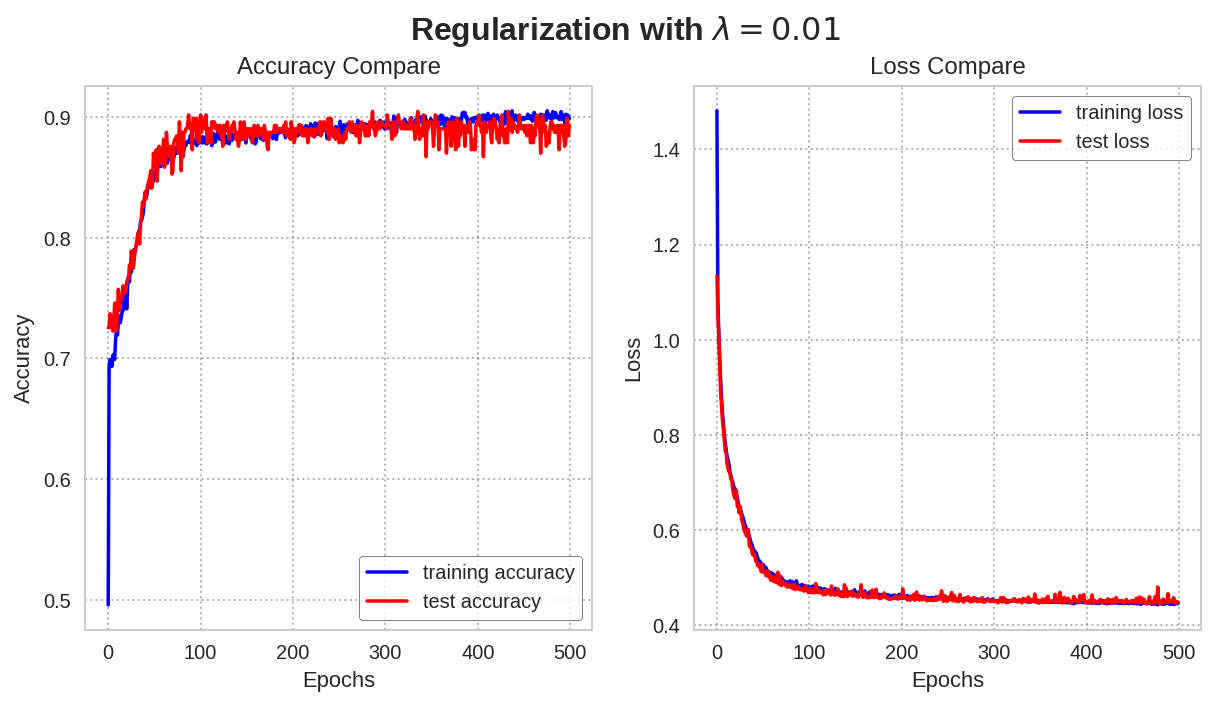

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_2.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_2.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_2.history.history['loss'],color='b',label='training loss')
ax2.plot(model_2.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Regularization with $\lambda=0.01$',fontsize=16, fontweight='bold')
plt.show()

In [0]:
model_2_train_score = model_2.evaluate(X_train,y_train,verbose=0)

In [0]:
model_2_score = model_2.evaluate(X_test,y_test,verbose=0)

In [26]:
print("Train loss: ",model_2_train_score[0])
print("Test loss: ",model_2_score[0])
print("Train accuracy: %.4f%%"% (model_2_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_2_score[1]*100))

Train loss:  0.44209667742683645
Test loss:  0.44784256023478647
Train accuracy: 90.1592%
Test accuracy: 89.3064%


In [27]:
y_pred_class_2 = model_2.predict_classes(X_test,verbose=0)
y_test_class_2= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_2,y_pred_class_2))

             precision    recall  f1-score   support

          0       0.97      0.96      0.97       251
          1       0.70      0.88      0.78        64
          2       0.55      0.46      0.50        13
          3       0.86      0.33      0.48        18

avg / total       0.90      0.89      0.89       346



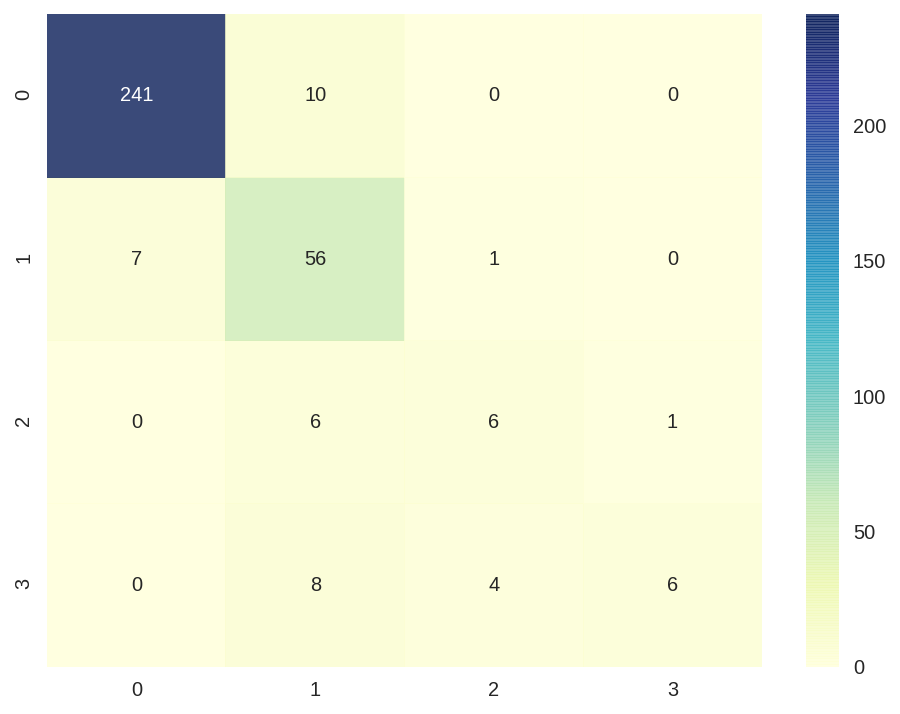

In [28]:
plot_confusion_matrix(model_2, X_test, y_test_class_2)

## 3. Neural Network with L2 Regularization $\lambda=0.001$

In [0]:
reg_3 = regularizers.l2(l=0.001)
model_3 = Sequential()
model_3.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=reg_3))
model_3.add(Dense(8, activation='relu',kernel_regularizer=reg_3))
model_3.add(Dense(4, activation='softmax',kernel_regularizer=reg_3))
model_3.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [30]:
model_3.history = model_3.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 393us/step - loss: 1.1412 - acc: 0.4414 - val_loss: 0.9421 - val_acc: 0.7168
Epoch 2/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.8889 - acc: 0.6910 - val_loss: 0.8483 - val_acc: 0.7254
Epoch 3/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.8329 - acc: 0.6939 - val_loss: 0.8036 - val_acc: 0.7254
Epoch 4/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.7920 - acc: 0.6946 - val_loss: 0.7734 - val_acc: 0.7283
Epoch 5/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.7541 - acc: 0.7026 - val_loss: 0.7591 - val_acc: 0.7457
Epoch 6/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.7237 - acc: 0.7185 - val_loss: 0.7037 - val_acc: 0.7370
Epoch 7/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.6905 - acc: 0.7265 - val_loss: 0.6773 - val_acc: 0

1382/1382 [==============================] - 0s 238us/step - loss: 0.5336 - acc: 0.8003 - val_loss: 0.5210 - val_acc: 0.8035
Epoch 15/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.5213 - acc: 0.8111 - val_loss: 0.5098 - val_acc: 0.8266
Epoch 16/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4954 - acc: 0.8191 - val_loss: 0.4801 - val_acc: 0.8382
Epoch 17/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4790 - acc: 0.8198 - val_loss: 0.4863 - val_acc: 0.8526
Epoch 18/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4602 - acc: 0.8350 - val_loss: 0.4502 - val_acc: 0.8468
Epoch 19/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4442 - acc: 0.8357 - val_loss: 0.4507 - val_acc: 0.8584
Epoch 20/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4306 - acc: 0.8444 - val_loss: 0.4221 - val_acc: 0.8555
Epoch 21/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 238us/step - loss: 0.3442 - acc: 0.8849 - val_loss: 0.3360 - val_acc: 0.8757
Epoch 29/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.3419 - acc: 0.8813 - val_loss: 0.3336 - val_acc: 0.8815
Epoch 30/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.3386 - acc: 0.8835 - val_loss: 0.3269 - val_acc: 0.8902
Epoch 31/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.3314 - acc: 0.8821 - val_loss: 0.3233 - val_acc: 0.8815
Epoch 32/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.3275 - acc: 0.8849 - val_loss: 0.3219 - val_acc: 0.8844
Epoch 33/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.3289 - acc: 0.8871 - val_loss: 0.3115 - val_acc: 0.8873
Epoch 34/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.3177 - acc: 0.8886 - val_loss: 0.3087 - val_acc: 0.8873
Epoch 35/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 231us/step - loss: 0.2908 - acc: 0.9038 - val_loss: 0.2870 - val_acc: 0.8960
Epoch 43/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2910 - acc: 0.9059 - val_loss: 0.2922 - val_acc: 0.8902
Epoch 44/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2834 - acc: 0.9074 - val_loss: 0.3197 - val_acc: 0.8815
Epoch 45/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2929 - acc: 0.9059 - val_loss: 0.2936 - val_acc: 0.8931
Epoch 46/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2816 - acc: 0.9139 - val_loss: 0.2778 - val_acc: 0.8988
Epoch 47/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2859 - acc: 0.8987 - val_loss: 0.2954 - val_acc: 0.8988
Epoch 48/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2824 - acc: 0.9074 - val_loss: 0.2758 - val_acc: 0.8960
Epoch 49/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 231us/step - loss: 0.2720 - acc: 0.9038 - val_loss: 0.2866 - val_acc: 0.8960
Epoch 57/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2688 - acc: 0.9161 - val_loss: 0.2652 - val_acc: 0.9075
Epoch 58/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.2687 - acc: 0.9139 - val_loss: 0.2623 - val_acc: 0.9075
Epoch 59/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2678 - acc: 0.9110 - val_loss: 0.2706 - val_acc: 0.8988
Epoch 60/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.2657 - acc: 0.9117 - val_loss: 0.2667 - val_acc: 0.8988
Epoch 61/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2666 - acc: 0.9161 - val_loss: 0.2768 - val_acc: 0.8988
Epoch 62/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2665 - acc: 0.9088 - val_loss: 0.2586 - val_acc: 0.9104
Epoch 63/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 227us/step - loss: 0.2601 - acc: 0.9161 - val_loss: 0.2555 - val_acc: 0.9133
Epoch 71/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2595 - acc: 0.9153 - val_loss: 0.2592 - val_acc: 0.9017
Epoch 72/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2601 - acc: 0.9161 - val_loss: 0.2686 - val_acc: 0.9017
Epoch 73/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2572 - acc: 0.9175 - val_loss: 0.2548 - val_acc: 0.9046
Epoch 74/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2593 - acc: 0.9168 - val_loss: 0.2551 - val_acc: 0.9104
Epoch 75/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2560 - acc: 0.9175 - val_loss: 0.2593 - val_acc: 0.9017
Epoch 76/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2600 - acc: 0.9139 - val_loss: 0.2589 - val_acc: 0.9017
Epoch 77/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 231us/step - loss: 0.2669 - acc: 0.9124 - val_loss: 0.2467 - val_acc: 0.9162
Epoch 85/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2497 - acc: 0.9211 - val_loss: 0.2494 - val_acc: 0.9133
Epoch 86/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2508 - acc: 0.9240 - val_loss: 0.2477 - val_acc: 0.9133
Epoch 87/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2516 - acc: 0.9197 - val_loss: 0.2569 - val_acc: 0.9104
Epoch 88/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2488 - acc: 0.9211 - val_loss: 0.2481 - val_acc: 0.9133
Epoch 89/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2480 - acc: 0.9197 - val_loss: 0.2465 - val_acc: 0.9133
Epoch 90/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2497 - acc: 0.9190 - val_loss: 0.2602 - val_acc: 0.9046
Epoch 91/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 228us/step - loss: 0.2479 - acc: 0.9219 - val_loss: 0.2535 - val_acc: 0.9046
Epoch 99/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2492 - acc: 0.9153 - val_loss: 0.2460 - val_acc: 0.9104
Epoch 100/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2444 - acc: 0.9226 - val_loss: 0.2438 - val_acc: 0.9191
Epoch 101/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2470 - acc: 0.9219 - val_loss: 0.2494 - val_acc: 0.9046
Epoch 102/500
1382/1382 [==============================] - 0s 248us/step - loss: 0.2434 - acc: 0.9190 - val_loss: 0.2451 - val_acc: 0.9104
Epoch 103/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2452 - acc: 0.9219 - val_loss: 0.2431 - val_acc: 0.9249
Epoch 104/500
1382/1382 [==============================] - 0s 246us/step - loss: 0.2430 - acc: 0.9255 - val_loss: 0.2490 - val_acc: 0.9075
Epoch 105/500
1382/1382 [=================

1382/1382 [==============================] - 0s 240us/step - loss: 0.2414 - acc: 0.9255 - val_loss: 0.2474 - val_acc: 0.9046
Epoch 113/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.2381 - acc: 0.9240 - val_loss: 0.2529 - val_acc: 0.9075
Epoch 114/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2415 - acc: 0.9226 - val_loss: 0.2482 - val_acc: 0.9133
Epoch 115/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2429 - acc: 0.9284 - val_loss: 0.2804 - val_acc: 0.8931
Epoch 116/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2473 - acc: 0.9233 - val_loss: 0.2442 - val_acc: 0.9162
Epoch 117/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2363 - acc: 0.9247 - val_loss: 0.2480 - val_acc: 0.9133
Epoch 118/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2352 - acc: 0.9276 - val_loss: 0.2449 - val_acc: 0.9162
Epoch 119/500
1382/1382 [================

1382/1382 [==============================] - 0s 247us/step - loss: 0.2389 - acc: 0.9240 - val_loss: 0.2583 - val_acc: 0.8988
Epoch 127/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.2399 - acc: 0.9247 - val_loss: 0.2400 - val_acc: 0.9191
Epoch 128/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2370 - acc: 0.9284 - val_loss: 0.2518 - val_acc: 0.9075
Epoch 129/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.2334 - acc: 0.9284 - val_loss: 0.2434 - val_acc: 0.9046
Epoch 130/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2316 - acc: 0.9305 - val_loss: 0.2405 - val_acc: 0.9162
Epoch 131/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.2316 - acc: 0.9305 - val_loss: 0.2452 - val_acc: 0.9104
Epoch 132/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2303 - acc: 0.9255 - val_loss: 0.2417 - val_acc: 0.9104
Epoch 133/500
1382/1382 [================

1382/1382 [==============================] - 0s 243us/step - loss: 0.2281 - acc: 0.9320 - val_loss: 0.2551 - val_acc: 0.9017
Epoch 141/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2313 - acc: 0.9240 - val_loss: 0.2661 - val_acc: 0.9046
Epoch 142/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2306 - acc: 0.9276 - val_loss: 0.2430 - val_acc: 0.9162
Epoch 143/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2282 - acc: 0.9356 - val_loss: 0.2369 - val_acc: 0.9191
Epoch 144/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2253 - acc: 0.9320 - val_loss: 0.2370 - val_acc: 0.9191
Epoch 145/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2263 - acc: 0.9313 - val_loss: 0.2321 - val_acc: 0.9220
Epoch 146/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2259 - acc: 0.9334 - val_loss: 0.2411 - val_acc: 0.9046
Epoch 147/500
1382/1382 [================

Epoch 154/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2195 - acc: 0.9349 - val_loss: 0.2311 - val_acc: 0.9220
Epoch 155/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2186 - acc: 0.9385 - val_loss: 0.2376 - val_acc: 0.9249
Epoch 156/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.2194 - acc: 0.9334 - val_loss: 0.2286 - val_acc: 0.9277
Epoch 157/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2189 - acc: 0.9407 - val_loss: 0.2396 - val_acc: 0.9162
Epoch 158/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2179 - acc: 0.9378 - val_loss: 0.2291 - val_acc: 0.9249
Epoch 159/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2191 - acc: 0.9334 - val_loss: 0.2328 - val_acc: 0.9220
Epoch 160/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2183 - acc: 0.9356 - val_loss: 0.2314 - val_acc: 0.9277
Epoch 161/500
1382/1382 [==

Epoch 168/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.2128 - acc: 0.9399 - val_loss: 0.2251 - val_acc: 0.9249
Epoch 169/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2154 - acc: 0.9399 - val_loss: 0.2397 - val_acc: 0.9162
Epoch 170/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.2168 - acc: 0.9414 - val_loss: 0.2427 - val_acc: 0.9162
Epoch 171/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2107 - acc: 0.9407 - val_loss: 0.2264 - val_acc: 0.9277
Epoch 172/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2127 - acc: 0.9428 - val_loss: 0.2279 - val_acc: 0.9277
Epoch 173/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2127 - acc: 0.9392 - val_loss: 0.2298 - val_acc: 0.9277
Epoch 174/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2112 - acc: 0.9443 - val_loss: 0.2321 - val_acc: 0.9249
Epoch 175/500
1382/1382 [==

Epoch 182/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2115 - acc: 0.9428 - val_loss: 0.2355 - val_acc: 0.9162
Epoch 183/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2117 - acc: 0.9450 - val_loss: 0.2269 - val_acc: 0.9306
Epoch 184/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2089 - acc: 0.9399 - val_loss: 0.2224 - val_acc: 0.9249
Epoch 185/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2089 - acc: 0.9479 - val_loss: 0.2345 - val_acc: 0.9191
Epoch 186/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2102 - acc: 0.9436 - val_loss: 0.2381 - val_acc: 0.9191
Epoch 187/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.2089 - acc: 0.9421 - val_loss: 0.2212 - val_acc: 0.9335
Epoch 188/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2091 - acc: 0.9414 - val_loss: 0.2345 - val_acc: 0.9220
Epoch 189/500
1382/1382 [==

Epoch 196/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2042 - acc: 0.9479 - val_loss: 0.2236 - val_acc: 0.9277
Epoch 197/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2083 - acc: 0.9443 - val_loss: 0.2194 - val_acc: 0.9335
Epoch 198/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2066 - acc: 0.9450 - val_loss: 0.2158 - val_acc: 0.9306
Epoch 199/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2030 - acc: 0.9515 - val_loss: 0.2223 - val_acc: 0.9277
Epoch 200/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2035 - acc: 0.9407 - val_loss: 0.2182 - val_acc: 0.9306
Epoch 201/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2035 - acc: 0.9493 - val_loss: 0.2174 - val_acc: 0.9335
Epoch 202/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2037 - acc: 0.9443 - val_loss: 0.2270 - val_acc: 0.9277
Epoch 203/500
1382/1382 [==

Epoch 210/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.2018 - acc: 0.9457 - val_loss: 0.2361 - val_acc: 0.9162
Epoch 211/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2030 - acc: 0.9443 - val_loss: 0.2171 - val_acc: 0.9306
Epoch 212/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1999 - acc: 0.9493 - val_loss: 0.2213 - val_acc: 0.9191
Epoch 213/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2148 - acc: 0.9465 - val_loss: 0.2204 - val_acc: 0.9335
Epoch 214/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.2019 - acc: 0.9450 - val_loss: 0.2126 - val_acc: 0.9306
Epoch 215/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.2051 - acc: 0.9508 - val_loss: 0.2201 - val_acc: 0.9249
Epoch 216/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1999 - acc: 0.9465 - val_loss: 0.2227 - val_acc: 0.9249
Epoch 217/500
1382/1382 [==

1382/1382 [==============================] - 0s 246us/step - loss: 0.2010 - acc: 0.9472 - val_loss: 0.2204 - val_acc: 0.9335
Epoch 224/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2007 - acc: 0.9493 - val_loss: 0.2157 - val_acc: 0.9364
Epoch 225/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.2031 - acc: 0.9515 - val_loss: 0.2245 - val_acc: 0.9393
Epoch 226/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2030 - acc: 0.9457 - val_loss: 0.2227 - val_acc: 0.9277
Epoch 227/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2037 - acc: 0.9450 - val_loss: 0.2277 - val_acc: 0.9249
Epoch 228/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1988 - acc: 0.9508 - val_loss: 0.2257 - val_acc: 0.9335
Epoch 229/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1980 - acc: 0.9472 - val_loss: 0.2177 - val_acc: 0.9249
Epoch 230/500
1382/1382 [================

Epoch 237/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1952 - acc: 0.9493 - val_loss: 0.2130 - val_acc: 0.9422
Epoch 238/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1982 - acc: 0.9559 - val_loss: 0.2111 - val_acc: 0.9335
Epoch 239/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1974 - acc: 0.9479 - val_loss: 0.2075 - val_acc: 0.9364
Epoch 240/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1981 - acc: 0.9501 - val_loss: 0.2114 - val_acc: 0.9306
Epoch 241/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.2080 - acc: 0.9428 - val_loss: 0.2225 - val_acc: 0.9306
Epoch 242/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1938 - acc: 0.9537 - val_loss: 0.2131 - val_acc: 0.9335
Epoch 243/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1951 - acc: 0.9515 - val_loss: 0.2130 - val_acc: 0.9335
Epoch 244/500
1382/1382 [==

1382/1382 [==============================] - 0s 240us/step - loss: 0.1951 - acc: 0.9486 - val_loss: 0.2106 - val_acc: 0.9306
Epoch 251/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1969 - acc: 0.9537 - val_loss: 0.2111 - val_acc: 0.9364
Epoch 252/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1964 - acc: 0.9551 - val_loss: 0.2190 - val_acc: 0.9306
Epoch 253/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1950 - acc: 0.9501 - val_loss: 0.2091 - val_acc: 0.9306
Epoch 254/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1934 - acc: 0.9566 - val_loss: 0.2219 - val_acc: 0.9364
Epoch 255/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1947 - acc: 0.9537 - val_loss: 0.2150 - val_acc: 0.9335
Epoch 256/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1931 - acc: 0.9551 - val_loss: 0.2183 - val_acc: 0.9335
Epoch 257/500
1382/1382 [================

Epoch 264/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1937 - acc: 0.9537 - val_loss: 0.2108 - val_acc: 0.9277
Epoch 265/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1927 - acc: 0.9501 - val_loss: 0.2078 - val_acc: 0.9335
Epoch 266/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1946 - acc: 0.9544 - val_loss: 0.2174 - val_acc: 0.9335
Epoch 267/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1923 - acc: 0.9537 - val_loss: 0.2061 - val_acc: 0.9335
Epoch 268/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1906 - acc: 0.9544 - val_loss: 0.2121 - val_acc: 0.9335
Epoch 269/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1923 - acc: 0.9530 - val_loss: 0.2091 - val_acc: 0.9364
Epoch 270/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1933 - acc: 0.9515 - val_loss: 0.2087 - val_acc: 0.9335
Epoch 271/500
1382/1382 [==

Epoch 278/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1900 - acc: 0.9551 - val_loss: 0.2062 - val_acc: 0.9393
Epoch 279/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1907 - acc: 0.9573 - val_loss: 0.2088 - val_acc: 0.9422
Epoch 280/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1909 - acc: 0.9544 - val_loss: 0.2219 - val_acc: 0.9277
Epoch 281/500
1382/1382 [==============================] - 0s 246us/step - loss: 0.1901 - acc: 0.9602 - val_loss: 0.2120 - val_acc: 0.9364
Epoch 282/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1910 - acc: 0.9559 - val_loss: 0.2102 - val_acc: 0.9364
Epoch 283/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1916 - acc: 0.9530 - val_loss: 0.2084 - val_acc: 0.9306
Epoch 284/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1937 - acc: 0.9551 - val_loss: 0.2072 - val_acc: 0.9451
Epoch 285/500
1382/1382 [==

Epoch 292/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1905 - acc: 0.9588 - val_loss: 0.2087 - val_acc: 0.9306
Epoch 293/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1883 - acc: 0.9566 - val_loss: 0.2043 - val_acc: 0.9364
Epoch 294/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1901 - acc: 0.9544 - val_loss: 0.2077 - val_acc: 0.9393
Epoch 295/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1893 - acc: 0.9537 - val_loss: 0.2233 - val_acc: 0.9249
Epoch 296/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1904 - acc: 0.9530 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 297/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1879 - acc: 0.9559 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 298/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1926 - acc: 0.9537 - val_loss: 0.2132 - val_acc: 0.9249
Epoch 299/500
1382/1382 [==

Epoch 306/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1872 - acc: 0.9559 - val_loss: 0.2068 - val_acc: 0.9335
Epoch 307/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1871 - acc: 0.9522 - val_loss: 0.2121 - val_acc: 0.9364
Epoch 308/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1900 - acc: 0.9551 - val_loss: 0.2049 - val_acc: 0.9393
Epoch 309/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1861 - acc: 0.9566 - val_loss: 0.2017 - val_acc: 0.9335
Epoch 310/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.1859 - acc: 0.9580 - val_loss: 0.2138 - val_acc: 0.9364
Epoch 311/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1862 - acc: 0.9559 - val_loss: 0.2037 - val_acc: 0.9364
Epoch 312/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1909 - acc: 0.9573 - val_loss: 0.2119 - val_acc: 0.9335
Epoch 313/500
1382/1382 [==

Epoch 320/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1862 - acc: 0.9537 - val_loss: 0.2186 - val_acc: 0.9364
Epoch 321/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1899 - acc: 0.9573 - val_loss: 0.2020 - val_acc: 0.9451
Epoch 322/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1870 - acc: 0.9544 - val_loss: 0.2096 - val_acc: 0.9335
Epoch 323/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1911 - acc: 0.9537 - val_loss: 0.2051 - val_acc: 0.9306
Epoch 324/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1842 - acc: 0.9580 - val_loss: 0.2030 - val_acc: 0.9422
Epoch 325/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1856 - acc: 0.9602 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 326/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1854 - acc: 0.9580 - val_loss: 0.2019 - val_acc: 0.9393
Epoch 327/500
1382/1382 [==

Epoch 334/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1849 - acc: 0.9580 - val_loss: 0.2109 - val_acc: 0.9393
Epoch 335/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1839 - acc: 0.9609 - val_loss: 0.2114 - val_acc: 0.9277
Epoch 336/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1871 - acc: 0.9559 - val_loss: 0.2119 - val_acc: 0.9306
Epoch 337/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1823 - acc: 0.9588 - val_loss: 0.2058 - val_acc: 0.9364
Epoch 338/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1906 - acc: 0.9515 - val_loss: 0.2004 - val_acc: 0.9422
Epoch 339/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1834 - acc: 0.9602 - val_loss: 0.2063 - val_acc: 0.9364
Epoch 340/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1831 - acc: 0.9595 - val_loss: 0.2089 - val_acc: 0.9335
Epoch 341/500
1382/1382 [==

Epoch 348/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1830 - acc: 0.9573 - val_loss: 0.2045 - val_acc: 0.9393
Epoch 349/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1901 - acc: 0.9479 - val_loss: 0.2114 - val_acc: 0.9249
Epoch 350/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1824 - acc: 0.9588 - val_loss: 0.2012 - val_acc: 0.9451
Epoch 351/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1850 - acc: 0.9580 - val_loss: 0.2061 - val_acc: 0.9364
Epoch 352/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1812 - acc: 0.9573 - val_loss: 0.2082 - val_acc: 0.9364
Epoch 353/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1821 - acc: 0.9645 - val_loss: 0.1995 - val_acc: 0.9451
Epoch 354/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1813 - acc: 0.9580 - val_loss: 0.2030 - val_acc: 0.9422
Epoch 355/500
1382/1382 [==

Epoch 362/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1862 - acc: 0.9544 - val_loss: 0.2057 - val_acc: 0.9335
Epoch 363/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1849 - acc: 0.9602 - val_loss: 0.2032 - val_acc: 0.9422
Epoch 364/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1823 - acc: 0.9588 - val_loss: 0.2032 - val_acc: 0.9480
Epoch 365/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1821 - acc: 0.9580 - val_loss: 0.2000 - val_acc: 0.9393
Epoch 366/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1817 - acc: 0.9559 - val_loss: 0.2143 - val_acc: 0.9335
Epoch 367/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1802 - acc: 0.9588 - val_loss: 0.1998 - val_acc: 0.9480
Epoch 368/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1818 - acc: 0.9573 - val_loss: 0.2012 - val_acc: 0.9451
Epoch 369/500
1382/1382 [==

1382/1382 [==============================] - 0s 227us/step - loss: 0.1853 - acc: 0.9515 - val_loss: 0.2105 - val_acc: 0.9364
Epoch 376/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1816 - acc: 0.9588 - val_loss: 0.2016 - val_acc: 0.9451
Epoch 377/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1790 - acc: 0.9609 - val_loss: 0.2035 - val_acc: 0.9364
Epoch 378/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1804 - acc: 0.9580 - val_loss: 0.2050 - val_acc: 0.9364
Epoch 379/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1837 - acc: 0.9580 - val_loss: 0.2163 - val_acc: 0.9277
Epoch 380/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1805 - acc: 0.9566 - val_loss: 0.1987 - val_acc: 0.9451
Epoch 381/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1786 - acc: 0.9609 - val_loss: 0.1998 - val_acc: 0.9451
Epoch 382/500
1382/1382 [================

Epoch 389/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1777 - acc: 0.9616 - val_loss: 0.2068 - val_acc: 0.9422
Epoch 390/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1800 - acc: 0.9588 - val_loss: 0.2125 - val_acc: 0.9451
Epoch 391/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1790 - acc: 0.9645 - val_loss: 0.2064 - val_acc: 0.9277
Epoch 392/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1800 - acc: 0.9609 - val_loss: 0.2014 - val_acc: 0.9393
Epoch 393/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1785 - acc: 0.9616 - val_loss: 0.2004 - val_acc: 0.9393
Epoch 394/500
1382/1382 [==============================] - 0s 246us/step - loss: 0.1776 - acc: 0.9580 - val_loss: 0.2014 - val_acc: 0.9480
Epoch 395/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1809 - acc: 0.9595 - val_loss: 0.2034 - val_acc: 0.9364
Epoch 396/500
1382/1382 [==

Epoch 403/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1825 - acc: 0.9559 - val_loss: 0.2005 - val_acc: 0.9335
Epoch 404/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1759 - acc: 0.9588 - val_loss: 0.1975 - val_acc: 0.9422
Epoch 405/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1788 - acc: 0.9595 - val_loss: 0.1997 - val_acc: 0.9364
Epoch 406/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1785 - acc: 0.9609 - val_loss: 0.2002 - val_acc: 0.9451
Epoch 407/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1776 - acc: 0.9616 - val_loss: 0.2049 - val_acc: 0.9277
Epoch 408/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1778 - acc: 0.9602 - val_loss: 0.1994 - val_acc: 0.9480
Epoch 409/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1764 - acc: 0.9616 - val_loss: 0.2069 - val_acc: 0.9364
Epoch 410/500
1382/1382 [==

Epoch 417/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1756 - acc: 0.9602 - val_loss: 0.2031 - val_acc: 0.9364
Epoch 418/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1751 - acc: 0.9602 - val_loss: 0.1977 - val_acc: 0.9335
Epoch 419/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1798 - acc: 0.9595 - val_loss: 0.2047 - val_acc: 0.9422
Epoch 420/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1815 - acc: 0.9566 - val_loss: 0.2048 - val_acc: 0.9393
Epoch 421/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1789 - acc: 0.9588 - val_loss: 0.1994 - val_acc: 0.9422
Epoch 422/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1783 - acc: 0.9588 - val_loss: 0.2033 - val_acc: 0.9335
Epoch 423/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1763 - acc: 0.9588 - val_loss: 0.1975 - val_acc: 0.9393
Epoch 424/500
1382/1382 [==

Epoch 431/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1795 - acc: 0.9566 - val_loss: 0.2067 - val_acc: 0.9364
Epoch 432/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1785 - acc: 0.9602 - val_loss: 0.1981 - val_acc: 0.9364
Epoch 433/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1760 - acc: 0.9616 - val_loss: 0.2003 - val_acc: 0.9306
Epoch 434/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1768 - acc: 0.9559 - val_loss: 0.2019 - val_acc: 0.9422
Epoch 435/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1812 - acc: 0.9544 - val_loss: 0.1995 - val_acc: 0.9422
Epoch 436/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1742 - acc: 0.9573 - val_loss: 0.1979 - val_acc: 0.9480
Epoch 437/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1753 - acc: 0.9616 - val_loss: 0.1994 - val_acc: 0.9451
Epoch 438/500
1382/1382 [==

1382/1382 [==============================] - 0s 234us/step - loss: 0.1788 - acc: 0.9602 - val_loss: 0.1933 - val_acc: 0.9480
Epoch 445/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1775 - acc: 0.9595 - val_loss: 0.1973 - val_acc: 0.9480
Epoch 446/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1772 - acc: 0.9588 - val_loss: 0.2015 - val_acc: 0.9451
Epoch 447/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1772 - acc: 0.9580 - val_loss: 0.2040 - val_acc: 0.9335
Epoch 448/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1743 - acc: 0.9624 - val_loss: 0.1972 - val_acc: 0.9480
Epoch 449/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1732 - acc: 0.9616 - val_loss: 0.2019 - val_acc: 0.9393
Epoch 450/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1774 - acc: 0.9573 - val_loss: 0.2006 - val_acc: 0.9393
Epoch 451/500
1382/1382 [================

1382/1382 [==============================] - 0s 227us/step - loss: 0.1743 - acc: 0.9653 - val_loss: 0.1978 - val_acc: 0.9393
Epoch 459/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1721 - acc: 0.9616 - val_loss: 0.2007 - val_acc: 0.9249
Epoch 460/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1745 - acc: 0.9566 - val_loss: 0.2012 - val_acc: 0.9422
Epoch 461/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.1731 - acc: 0.9609 - val_loss: 0.2076 - val_acc: 0.9422
Epoch 462/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1756 - acc: 0.9573 - val_loss: 0.1984 - val_acc: 0.9422
Epoch 463/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1760 - acc: 0.9588 - val_loss: 0.1960 - val_acc: 0.9393
Epoch 464/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1788 - acc: 0.9580 - val_loss: 0.1978 - val_acc: 0.9422
Epoch 465/500
1382/1382 [================

Epoch 472/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1726 - acc: 0.9602 - val_loss: 0.1922 - val_acc: 0.9480
Epoch 473/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1757 - acc: 0.9602 - val_loss: 0.1957 - val_acc: 0.9422
Epoch 474/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.1735 - acc: 0.9616 - val_loss: 0.1925 - val_acc: 0.9451
Epoch 475/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1727 - acc: 0.9631 - val_loss: 0.2014 - val_acc: 0.9364
Epoch 476/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1748 - acc: 0.9595 - val_loss: 0.1952 - val_acc: 0.9480
Epoch 477/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1750 - acc: 0.9580 - val_loss: 0.1985 - val_acc: 0.9393
Epoch 478/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1733 - acc: 0.9602 - val_loss: 0.1987 - val_acc: 0.9422
Epoch 479/500
1382/1382 [==

1382/1382 [==============================] - 0s 233us/step - loss: 0.1720 - acc: 0.9588 - val_loss: 0.1905 - val_acc: 0.9422
Epoch 486/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1721 - acc: 0.9602 - val_loss: 0.1984 - val_acc: 0.9393
Epoch 487/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1701 - acc: 0.9645 - val_loss: 0.1914 - val_acc: 0.9451
Epoch 488/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1707 - acc: 0.9602 - val_loss: 0.1925 - val_acc: 0.9451
Epoch 489/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1721 - acc: 0.9645 - val_loss: 0.1945 - val_acc: 0.9451
Epoch 490/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1725 - acc: 0.9624 - val_loss: 0.2056 - val_acc: 0.9451
Epoch 491/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1732 - acc: 0.9595 - val_loss: 0.1962 - val_acc: 0.9422
Epoch 492/500
1382/1382 [================

Epoch 499/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1703 - acc: 0.9624 - val_loss: 0.2030 - val_acc: 0.9393
Epoch 500/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1720 - acc: 0.9616 - val_loss: 0.1926 - val_acc: 0.9422


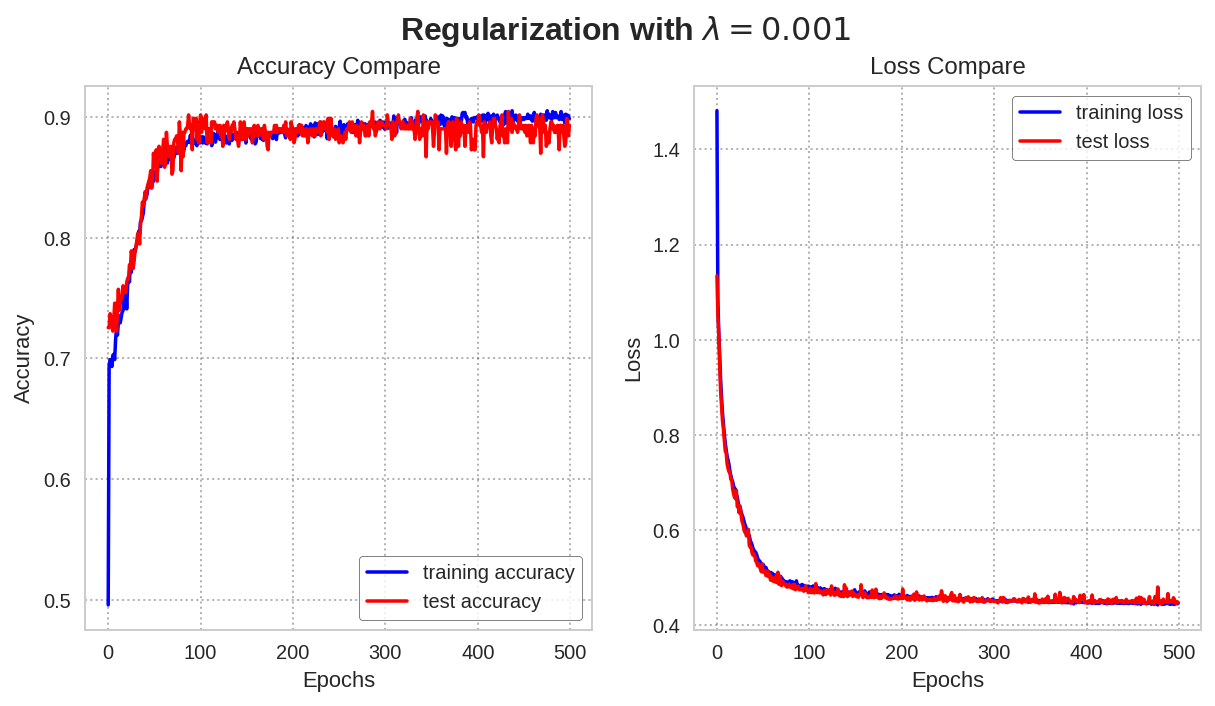

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_2.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_2.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_2.history.history['loss'],color='b',label='training loss')
ax2.plot(model_2.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Regularization with $\lambda=0.001$',fontsize=16, fontweight='bold')
plt.show()

In [32]:
model_3_train_score = model_3.evaluate(X_train,y_train,verbose=0)
model_3_score = model_3.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_3_train_score[0])
print("Test loss: ",model_3_score[0])
print("Train accuracy: %.4f%%"% (model_3_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_3_score[1]*100))

Train loss:  0.16669308884789044
Test loss:  0.19262682728340172
Train accuracy: 96.5268%
Test accuracy: 94.2197%


In [33]:
y_pred_class_3 = model_3.predict_classes(X_test,verbose=0)
y_test_class_3= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_3,y_pred_class_3))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       251
          1       0.82      0.92      0.87        64
          2       0.73      0.85      0.79        13
          3       1.00      0.83      0.91        18

avg / total       0.95      0.94      0.94       346



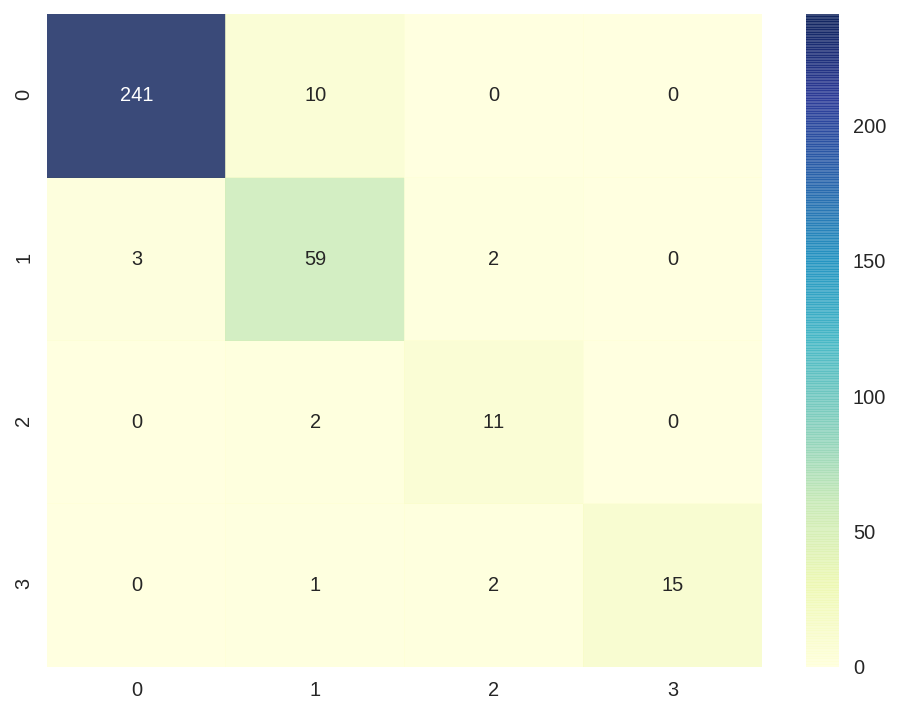

In [34]:
plot_confusion_matrix(model_3, X_test, y_test_class_3)

## 4. Neural Network with L2 Regularization $\lambda=0.0001$

In [0]:
reg_4 = regularizers.l2(l=0.0001)
model_4 = Sequential()
model_4.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=reg_4))
model_4.add(Dense(8, activation='relu',kernel_regularizer=reg_4))
model_4.add(Dense(4, activation='softmax',kernel_regularizer=reg_4))
model_4.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [36]:
model_4.history = model_4.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 393us/step - loss: 1.2582 - acc: 0.3958 - val_loss: 1.0317 - val_acc: 0.6936
Epoch 2/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.8908 - acc: 0.6910 - val_loss: 0.7789 - val_acc: 0.7254
Epoch 3/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.7559 - acc: 0.6954 - val_loss: 0.7491 - val_acc: 0.7312
Epoch 4/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.7162 - acc: 0.7077 - val_loss: 0.7133 - val_acc: 0.7370
Epoch 5/500
1382/1382 [==============================] - 0s 203us/step - loss: 0.6849 - acc: 0.7243 - val_loss: 0.6794 - val_acc: 0.7514
Epoch 6/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.6576 - acc: 0.7366 - val_loss: 0.6473 - val_acc: 0.7514
Epoch 7/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.6321 - acc: 0.7511 - val_loss: 0.6496 - val_acc: 0

1382/1382 [==============================] - 0s 228us/step - loss: 0.4705 - acc: 0.8198 - val_loss: 0.4657 - val_acc: 0.8266
Epoch 15/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4553 - acc: 0.8227 - val_loss: 0.4614 - val_acc: 0.8324
Epoch 16/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4350 - acc: 0.8372 - val_loss: 0.4719 - val_acc: 0.8382
Epoch 17/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4200 - acc: 0.8437 - val_loss: 0.4317 - val_acc: 0.8468
Epoch 18/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4072 - acc: 0.8372 - val_loss: 0.4076 - val_acc: 0.8439
Epoch 19/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.3939 - acc: 0.8524 - val_loss: 0.3918 - val_acc: 0.8382
Epoch 20/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.3808 - acc: 0.8546 - val_loss: 0.3874 - val_acc: 0.8671
Epoch 21/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 239us/step - loss: 0.3091 - acc: 0.8777 - val_loss: 0.3119 - val_acc: 0.8728
Epoch 29/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.3029 - acc: 0.8770 - val_loss: 0.3052 - val_acc: 0.8757
Epoch 30/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2974 - acc: 0.8806 - val_loss: 0.3076 - val_acc: 0.8728
Epoch 31/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2905 - acc: 0.8821 - val_loss: 0.3005 - val_acc: 0.8699
Epoch 32/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2864 - acc: 0.8828 - val_loss: 0.3028 - val_acc: 0.8699
Epoch 33/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2827 - acc: 0.8864 - val_loss: 0.2909 - val_acc: 0.8815
Epoch 34/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.2774 - acc: 0.8878 - val_loss: 0.2853 - val_acc: 0.8728
Epoch 35/500
1382/1382 [=======================

Epoch 42/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2513 - acc: 0.9016 - val_loss: 0.2659 - val_acc: 0.8873
Epoch 43/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2481 - acc: 0.9009 - val_loss: 0.2652 - val_acc: 0.8844
Epoch 44/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2489 - acc: 0.8922 - val_loss: 0.2498 - val_acc: 0.9017
Epoch 45/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.2442 - acc: 0.9052 - val_loss: 0.2542 - val_acc: 0.8931
Epoch 46/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2420 - acc: 0.9067 - val_loss: 0.2605 - val_acc: 0.8815
Epoch 47/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2397 - acc: 0.9117 - val_loss: 0.2465 - val_acc: 0.8988
Epoch 48/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2415 - acc: 0.9059 - val_loss: 0.2505 - val_acc: 0.8902
Epoch 49/500
1382/1382 [==========

Epoch 56/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2236 - acc: 0.9269 - val_loss: 0.2306 - val_acc: 0.9017
Epoch 57/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2210 - acc: 0.9284 - val_loss: 0.2248 - val_acc: 0.9017
Epoch 58/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2218 - acc: 0.9197 - val_loss: 0.2577 - val_acc: 0.8960
Epoch 59/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2204 - acc: 0.9269 - val_loss: 0.2204 - val_acc: 0.9133
Epoch 60/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2196 - acc: 0.9262 - val_loss: 0.2157 - val_acc: 0.9075
Epoch 61/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2151 - acc: 0.9320 - val_loss: 0.2157 - val_acc: 0.9104
Epoch 62/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2162 - acc: 0.9262 - val_loss: 0.2197 - val_acc: 0.8988
Epoch 63/500
1382/1382 [==========

1382/1382 [==============================] - 0s 240us/step - loss: 0.2023 - acc: 0.9349 - val_loss: 0.2063 - val_acc: 0.9191
Epoch 71/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2042 - acc: 0.9269 - val_loss: 0.2214 - val_acc: 0.9017
Epoch 72/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1995 - acc: 0.9342 - val_loss: 0.2063 - val_acc: 0.9133
Epoch 73/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1997 - acc: 0.9334 - val_loss: 0.2018 - val_acc: 0.9075
Epoch 74/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1987 - acc: 0.9327 - val_loss: 0.2021 - val_acc: 0.9133
Epoch 75/500
1382/1382 [==============================] - 0s 247us/step - loss: 0.2046 - acc: 0.9298 - val_loss: 0.2491 - val_acc: 0.9162
Epoch 76/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2024 - acc: 0.9334 - val_loss: 0.2175 - val_acc: 0.9017
Epoch 77/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 239us/step - loss: 0.1906 - acc: 0.9349 - val_loss: 0.1952 - val_acc: 0.9133
Epoch 85/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1878 - acc: 0.9378 - val_loss: 0.1888 - val_acc: 0.9277
Epoch 86/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1889 - acc: 0.9327 - val_loss: 0.1959 - val_acc: 0.9104
Epoch 87/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1898 - acc: 0.9399 - val_loss: 0.1896 - val_acc: 0.9306
Epoch 88/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1874 - acc: 0.9378 - val_loss: 0.1986 - val_acc: 0.9075
Epoch 89/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1832 - acc: 0.9392 - val_loss: 0.1896 - val_acc: 0.9191
Epoch 90/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1834 - acc: 0.9313 - val_loss: 0.1868 - val_acc: 0.9277
Epoch 91/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 236us/step - loss: 0.1808 - acc: 0.9436 - val_loss: 0.1807 - val_acc: 0.9306
Epoch 99/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1882 - acc: 0.9356 - val_loss: 0.1874 - val_acc: 0.9162
Epoch 100/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1767 - acc: 0.9356 - val_loss: 0.2072 - val_acc: 0.9191
Epoch 101/500
1382/1382 [==============================] - 0s 248us/step - loss: 0.1842 - acc: 0.9349 - val_loss: 0.1798 - val_acc: 0.9306
Epoch 102/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1751 - acc: 0.9363 - val_loss: 0.1923 - val_acc: 0.9133
Epoch 103/500
1382/1382 [==============================] - 0s 249us/step - loss: 0.1773 - acc: 0.9399 - val_loss: 0.1798 - val_acc: 0.9191
Epoch 104/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1719 - acc: 0.9407 - val_loss: 0.1960 - val_acc: 0.9075
Epoch 105/500
1382/1382 [=================

1382/1382 [==============================] - 0s 242us/step - loss: 0.1707 - acc: 0.9428 - val_loss: 0.1857 - val_acc: 0.9075
Epoch 113/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1675 - acc: 0.9407 - val_loss: 0.1781 - val_acc: 0.9220
Epoch 114/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1703 - acc: 0.9385 - val_loss: 0.1858 - val_acc: 0.9162
Epoch 115/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1644 - acc: 0.9457 - val_loss: 0.1854 - val_acc: 0.9104
Epoch 116/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1651 - acc: 0.9443 - val_loss: 0.1730 - val_acc: 0.9335
Epoch 117/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1644 - acc: 0.9436 - val_loss: 0.1854 - val_acc: 0.9277
Epoch 118/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1641 - acc: 0.9479 - val_loss: 0.1745 - val_acc: 0.9277
Epoch 119/500
1382/1382 [================

1382/1382 [==============================] - 0s 230us/step - loss: 0.1603 - acc: 0.9465 - val_loss: 0.1647 - val_acc: 0.9364
Epoch 127/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1589 - acc: 0.9450 - val_loss: 0.1804 - val_acc: 0.9133
Epoch 128/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1576 - acc: 0.9450 - val_loss: 0.1654 - val_acc: 0.9306
Epoch 129/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1606 - acc: 0.9443 - val_loss: 0.1630 - val_acc: 0.9364
Epoch 130/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1599 - acc: 0.9457 - val_loss: 0.1708 - val_acc: 0.9220
Epoch 131/500
1382/1382 [==============================] - 0s 255us/step - loss: 0.1659 - acc: 0.9421 - val_loss: 0.1666 - val_acc: 0.9277
Epoch 132/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1556 - acc: 0.9486 - val_loss: 0.1583 - val_acc: 0.9451
Epoch 133/500
1382/1382 [================

Epoch 140/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1549 - acc: 0.9457 - val_loss: 0.1691 - val_acc: 0.9277
Epoch 141/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1482 - acc: 0.9508 - val_loss: 0.1612 - val_acc: 0.9335
Epoch 142/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1499 - acc: 0.9465 - val_loss: 0.1769 - val_acc: 0.9335
Epoch 143/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1518 - acc: 0.9486 - val_loss: 0.1592 - val_acc: 0.9306
Epoch 144/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1480 - acc: 0.9479 - val_loss: 0.1589 - val_acc: 0.9277
Epoch 145/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1493 - acc: 0.9465 - val_loss: 0.1558 - val_acc: 0.9306
Epoch 146/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1458 - acc: 0.9501 - val_loss: 0.1624 - val_acc: 0.9277
Epoch 147/500
1382/1382 [==

Epoch 154/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1449 - acc: 0.9508 - val_loss: 0.1686 - val_acc: 0.9335
Epoch 155/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1382 - acc: 0.9559 - val_loss: 0.1475 - val_acc: 0.9422
Epoch 156/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1437 - acc: 0.9450 - val_loss: 0.1597 - val_acc: 0.9364
Epoch 157/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1442 - acc: 0.9508 - val_loss: 0.1570 - val_acc: 0.9393
Epoch 158/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1416 - acc: 0.9537 - val_loss: 0.1458 - val_acc: 0.9393
Epoch 159/500
1382/1382 [==============================] - 0s 248us/step - loss: 0.1414 - acc: 0.9522 - val_loss: 0.1522 - val_acc: 0.9335
Epoch 160/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1404 - acc: 0.9501 - val_loss: 0.1504 - val_acc: 0.9393
Epoch 161/500
1382/1382 [==

Epoch 168/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1358 - acc: 0.9559 - val_loss: 0.1636 - val_acc: 0.9335
Epoch 169/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1359 - acc: 0.9573 - val_loss: 0.1446 - val_acc: 0.9393
Epoch 170/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1357 - acc: 0.9544 - val_loss: 0.1474 - val_acc: 0.9364
Epoch 171/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1382 - acc: 0.9486 - val_loss: 0.1473 - val_acc: 0.9422
Epoch 172/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1336 - acc: 0.9551 - val_loss: 0.1540 - val_acc: 0.9277
Epoch 173/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1407 - acc: 0.9522 - val_loss: 0.1518 - val_acc: 0.9393
Epoch 174/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1330 - acc: 0.9566 - val_loss: 0.1531 - val_acc: 0.9306
Epoch 175/500
1382/1382 [==

Epoch 182/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1322 - acc: 0.9530 - val_loss: 0.1479 - val_acc: 0.9306
Epoch 183/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1331 - acc: 0.9551 - val_loss: 0.1472 - val_acc: 0.9306
Epoch 184/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1300 - acc: 0.9559 - val_loss: 0.1373 - val_acc: 0.9364
Epoch 185/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1315 - acc: 0.9551 - val_loss: 0.1388 - val_acc: 0.9364
Epoch 186/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1276 - acc: 0.9580 - val_loss: 0.1455 - val_acc: 0.9306
Epoch 187/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1325 - acc: 0.9522 - val_loss: 0.1491 - val_acc: 0.9364
Epoch 188/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1312 - acc: 0.9522 - val_loss: 0.1405 - val_acc: 0.9393
Epoch 189/500
1382/1382 [==

Epoch 196/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1280 - acc: 0.9609 - val_loss: 0.1445 - val_acc: 0.9306
Epoch 197/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1240 - acc: 0.9602 - val_loss: 0.1471 - val_acc: 0.9220
Epoch 198/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1252 - acc: 0.9551 - val_loss: 0.1445 - val_acc: 0.9335
Epoch 199/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1245 - acc: 0.9609 - val_loss: 0.1410 - val_acc: 0.9393
Epoch 200/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1247 - acc: 0.9588 - val_loss: 0.1392 - val_acc: 0.9364
Epoch 201/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1256 - acc: 0.9559 - val_loss: 0.1359 - val_acc: 0.9364
Epoch 202/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1222 - acc: 0.9580 - val_loss: 0.1517 - val_acc: 0.9364
Epoch 203/500
1382/1382 [==

Epoch 210/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1213 - acc: 0.9580 - val_loss: 0.1432 - val_acc: 0.9364
Epoch 211/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1215 - acc: 0.9588 - val_loss: 0.1321 - val_acc: 0.9480
Epoch 212/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1226 - acc: 0.9551 - val_loss: 0.1357 - val_acc: 0.9451
Epoch 213/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1214 - acc: 0.9580 - val_loss: 0.1339 - val_acc: 0.9393
Epoch 214/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1212 - acc: 0.9609 - val_loss: 0.1374 - val_acc: 0.9451
Epoch 215/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1252 - acc: 0.9580 - val_loss: 0.1350 - val_acc: 0.9364
Epoch 216/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1190 - acc: 0.9602 - val_loss: 0.1528 - val_acc: 0.9364
Epoch 217/500
1382/1382 [==

Epoch 224/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1209 - acc: 0.9588 - val_loss: 0.1485 - val_acc: 0.9393
Epoch 225/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1246 - acc: 0.9530 - val_loss: 0.1354 - val_acc: 0.9393
Epoch 226/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1191 - acc: 0.9537 - val_loss: 0.1369 - val_acc: 0.9451
Epoch 227/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1145 - acc: 0.9631 - val_loss: 0.1490 - val_acc: 0.9335
Epoch 228/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1184 - acc: 0.9595 - val_loss: 0.1364 - val_acc: 0.9364
Epoch 229/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1193 - acc: 0.9616 - val_loss: 0.1409 - val_acc: 0.9364
Epoch 230/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1169 - acc: 0.9566 - val_loss: 0.1378 - val_acc: 0.9364
Epoch 231/500
1382/1382 [==

1382/1382 [==============================] - 0s 233us/step - loss: 0.1150 - acc: 0.9609 - val_loss: 0.1368 - val_acc: 0.9422
Epoch 238/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1137 - acc: 0.9566 - val_loss: 0.1328 - val_acc: 0.9422
Epoch 239/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1132 - acc: 0.9638 - val_loss: 0.1456 - val_acc: 0.9422
Epoch 240/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1113 - acc: 0.9624 - val_loss: 0.1355 - val_acc: 0.9393
Epoch 241/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1156 - acc: 0.9631 - val_loss: 0.1302 - val_acc: 0.9306
Epoch 242/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1193 - acc: 0.9566 - val_loss: 0.1274 - val_acc: 0.9509
Epoch 243/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1132 - acc: 0.9645 - val_loss: 0.1306 - val_acc: 0.9422
Epoch 244/500
1382/1382 [================

Epoch 251/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1117 - acc: 0.9653 - val_loss: 0.1287 - val_acc: 0.9422
Epoch 252/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1114 - acc: 0.9624 - val_loss: 0.1314 - val_acc: 0.9393
Epoch 253/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1113 - acc: 0.9653 - val_loss: 0.1337 - val_acc: 0.9480
Epoch 254/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1093 - acc: 0.9667 - val_loss: 0.1448 - val_acc: 0.9451
Epoch 255/500
1382/1382 [==============================] - 0s 249us/step - loss: 0.1101 - acc: 0.9645 - val_loss: 0.1245 - val_acc: 0.9451
Epoch 256/500
1382/1382 [==============================] - 0s 247us/step - loss: 0.1134 - acc: 0.9631 - val_loss: 0.1274 - val_acc: 0.9422
Epoch 257/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1085 - acc: 0.9645 - val_loss: 0.1321 - val_acc: 0.9480
Epoch 258/500
1382/1382 [==

Epoch 265/500
1382/1382 [==============================] - 0s 249us/step - loss: 0.1078 - acc: 0.9645 - val_loss: 0.1258 - val_acc: 0.9451
Epoch 266/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1061 - acc: 0.9660 - val_loss: 0.1318 - val_acc: 0.9451
Epoch 267/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.1099 - acc: 0.9653 - val_loss: 0.1247 - val_acc: 0.9451
Epoch 268/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1058 - acc: 0.9631 - val_loss: 0.1210 - val_acc: 0.9480
Epoch 269/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1059 - acc: 0.9660 - val_loss: 0.1249 - val_acc: 0.9422
Epoch 270/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1073 - acc: 0.9653 - val_loss: 0.1268 - val_acc: 0.9480
Epoch 271/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.1052 - acc: 0.9645 - val_loss: 0.1214 - val_acc: 0.9509
Epoch 272/500
1382/1382 [==

Epoch 279/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1067 - acc: 0.9653 - val_loss: 0.1264 - val_acc: 0.9480
Epoch 280/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1045 - acc: 0.9653 - val_loss: 0.1208 - val_acc: 0.9509
Epoch 281/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1036 - acc: 0.9660 - val_loss: 0.1216 - val_acc: 0.9509
Epoch 282/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1044 - acc: 0.9653 - val_loss: 0.1278 - val_acc: 0.9451
Epoch 283/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1066 - acc: 0.9667 - val_loss: 0.1267 - val_acc: 0.9509
Epoch 284/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1031 - acc: 0.9689 - val_loss: 0.1255 - val_acc: 0.9480
Epoch 285/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1044 - acc: 0.9660 - val_loss: 0.1272 - val_acc: 0.9480
Epoch 286/500
1382/1382 [==

Epoch 293/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1040 - acc: 0.9689 - val_loss: 0.1176 - val_acc: 0.9566
Epoch 294/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1030 - acc: 0.9667 - val_loss: 0.1170 - val_acc: 0.9624
Epoch 295/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1018 - acc: 0.9689 - val_loss: 0.1169 - val_acc: 0.9624
Epoch 296/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1011 - acc: 0.9711 - val_loss: 0.1243 - val_acc: 0.9538
Epoch 297/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0999 - acc: 0.9689 - val_loss: 0.1217 - val_acc: 0.9538
Epoch 298/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1005 - acc: 0.9703 - val_loss: 0.1174 - val_acc: 0.9538
Epoch 299/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1009 - acc: 0.9660 - val_loss: 0.1359 - val_acc: 0.9480
Epoch 300/500
1382/1382 [==

Epoch 307/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0971 - acc: 0.9703 - val_loss: 0.1185 - val_acc: 0.9509
Epoch 308/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0974 - acc: 0.9718 - val_loss: 0.1135 - val_acc: 0.9566
Epoch 309/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0979 - acc: 0.9674 - val_loss: 0.1151 - val_acc: 0.9538
Epoch 310/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.0977 - acc: 0.9689 - val_loss: 0.1229 - val_acc: 0.9480
Epoch 311/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0966 - acc: 0.9703 - val_loss: 0.1207 - val_acc: 0.9538
Epoch 312/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1007 - acc: 0.9682 - val_loss: 0.1276 - val_acc: 0.9480
Epoch 313/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1032 - acc: 0.9660 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 314/500
1382/1382 [==

Epoch 321/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0988 - acc: 0.9667 - val_loss: 0.1130 - val_acc: 0.9566
Epoch 322/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0963 - acc: 0.9703 - val_loss: 0.1094 - val_acc: 0.9653
Epoch 323/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0943 - acc: 0.9703 - val_loss: 0.1238 - val_acc: 0.9451
Epoch 324/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0961 - acc: 0.9645 - val_loss: 0.1141 - val_acc: 0.9566
Epoch 325/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0980 - acc: 0.9689 - val_loss: 0.1139 - val_acc: 0.9624
Epoch 326/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0969 - acc: 0.9725 - val_loss: 0.1173 - val_acc: 0.9509
Epoch 327/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0960 - acc: 0.9732 - val_loss: 0.1112 - val_acc: 0.9595
Epoch 328/500
1382/1382 [==

1382/1382 [==============================] - 0s 238us/step - loss: 0.0957 - acc: 0.9725 - val_loss: 0.1135 - val_acc: 0.9566
Epoch 335/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1020 - acc: 0.9667 - val_loss: 0.1200 - val_acc: 0.9538
Epoch 336/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1049 - acc: 0.9674 - val_loss: 0.1103 - val_acc: 0.9595
Epoch 337/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0975 - acc: 0.9703 - val_loss: 0.1177 - val_acc: 0.9509
Epoch 338/500
1382/1382 [==============================] - 0s 249us/step - loss: 0.0940 - acc: 0.9711 - val_loss: 0.1139 - val_acc: 0.9653
Epoch 339/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0921 - acc: 0.9711 - val_loss: 0.1126 - val_acc: 0.9682
Epoch 340/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0940 - acc: 0.9696 - val_loss: 0.1134 - val_acc: 0.9653
Epoch 341/500
1382/1382 [================

1382/1382 [==============================] - 0s 236us/step - loss: 0.0951 - acc: 0.9732 - val_loss: 0.1208 - val_acc: 0.9480
Epoch 349/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0953 - acc: 0.9732 - val_loss: 0.1111 - val_acc: 0.9624
Epoch 350/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0941 - acc: 0.9732 - val_loss: 0.1150 - val_acc: 0.9595
Epoch 351/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1011 - acc: 0.9682 - val_loss: 0.1169 - val_acc: 0.9509
Epoch 352/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0928 - acc: 0.9703 - val_loss: 0.1279 - val_acc: 0.9451
Epoch 353/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.0989 - acc: 0.9703 - val_loss: 0.1129 - val_acc: 0.9509
Epoch 354/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0908 - acc: 0.9740 - val_loss: 0.1146 - val_acc: 0.9509
Epoch 355/500
1382/1382 [================

1382/1382 [==============================] - 0s 238us/step - loss: 0.0928 - acc: 0.9732 - val_loss: 0.1086 - val_acc: 0.9624
Epoch 363/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0912 - acc: 0.9711 - val_loss: 0.1270 - val_acc: 0.9538
Epoch 364/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0933 - acc: 0.9725 - val_loss: 0.1127 - val_acc: 0.9624
Epoch 365/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0920 - acc: 0.9776 - val_loss: 0.1148 - val_acc: 0.9509
Epoch 366/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0913 - acc: 0.9718 - val_loss: 0.1078 - val_acc: 0.9711
Epoch 367/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0907 - acc: 0.9761 - val_loss: 0.1084 - val_acc: 0.9769
Epoch 368/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0876 - acc: 0.9747 - val_loss: 0.1284 - val_acc: 0.9451
Epoch 369/500
1382/1382 [================

Epoch 376/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0979 - acc: 0.9689 - val_loss: 0.1280 - val_acc: 0.9451
Epoch 377/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0861 - acc: 0.9747 - val_loss: 0.1071 - val_acc: 0.9595
Epoch 378/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0885 - acc: 0.9754 - val_loss: 0.1068 - val_acc: 0.9682
Epoch 379/500
1382/1382 [==============================] - 0s 247us/step - loss: 0.0891 - acc: 0.9725 - val_loss: 0.1077 - val_acc: 0.9653
Epoch 380/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0893 - acc: 0.9754 - val_loss: 0.1070 - val_acc: 0.9624
Epoch 381/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0869 - acc: 0.9732 - val_loss: 0.1038 - val_acc: 0.9653
Epoch 382/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0863 - acc: 0.9740 - val_loss: 0.1078 - val_acc: 0.9682
Epoch 383/500
1382/1382 [==

1382/1382 [==============================] - 0s 235us/step - loss: 0.0903 - acc: 0.9732 - val_loss: 0.1110 - val_acc: 0.9566
Epoch 390/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0844 - acc: 0.9754 - val_loss: 0.1161 - val_acc: 0.9595
Epoch 391/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0869 - acc: 0.9768 - val_loss: 0.1058 - val_acc: 0.9653
Epoch 392/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0885 - acc: 0.9761 - val_loss: 0.1058 - val_acc: 0.9624
Epoch 393/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0853 - acc: 0.9761 - val_loss: 0.1069 - val_acc: 0.9653
Epoch 394/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0870 - acc: 0.9761 - val_loss: 0.1094 - val_acc: 0.9653
Epoch 395/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0908 - acc: 0.9703 - val_loss: 0.1092 - val_acc: 0.9595
Epoch 396/500
1382/1382 [================

1382/1382 [==============================] - 0s 226us/step - loss: 0.0862 - acc: 0.9761 - val_loss: 0.1042 - val_acc: 0.9682
Epoch 404/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0898 - acc: 0.9725 - val_loss: 0.1202 - val_acc: 0.9538
Epoch 405/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0834 - acc: 0.9768 - val_loss: 0.1075 - val_acc: 0.9624
Epoch 406/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0829 - acc: 0.9761 - val_loss: 0.1186 - val_acc: 0.9480
Epoch 407/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0900 - acc: 0.9732 - val_loss: 0.1065 - val_acc: 0.9566
Epoch 408/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0874 - acc: 0.9740 - val_loss: 0.1029 - val_acc: 0.9740
Epoch 409/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0830 - acc: 0.9783 - val_loss: 0.1070 - val_acc: 0.9595
Epoch 410/500
1382/1382 [================

1382/1382 [==============================] - 0s 237us/step - loss: 0.0866 - acc: 0.9732 - val_loss: 0.1067 - val_acc: 0.9595
Epoch 418/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.0815 - acc: 0.9776 - val_loss: 0.1059 - val_acc: 0.9624
Epoch 419/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0816 - acc: 0.9761 - val_loss: 0.1124 - val_acc: 0.9566
Epoch 420/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0812 - acc: 0.9768 - val_loss: 0.1048 - val_acc: 0.9624
Epoch 421/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.0846 - acc: 0.9754 - val_loss: 0.1178 - val_acc: 0.9480
Epoch 422/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0827 - acc: 0.9783 - val_loss: 0.1040 - val_acc: 0.9653
Epoch 423/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0861 - acc: 0.9747 - val_loss: 0.1111 - val_acc: 0.9595
Epoch 424/500
1382/1382 [================

Epoch 431/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0807 - acc: 0.9812 - val_loss: 0.1049 - val_acc: 0.9653
Epoch 432/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0835 - acc: 0.9776 - val_loss: 0.1012 - val_acc: 0.9711
Epoch 433/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0821 - acc: 0.9761 - val_loss: 0.1000 - val_acc: 0.9682
Epoch 434/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0801 - acc: 0.9776 - val_loss: 0.0988 - val_acc: 0.9682
Epoch 435/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0784 - acc: 0.9797 - val_loss: 0.1025 - val_acc: 0.9653
Epoch 436/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0832 - acc: 0.9776 - val_loss: 0.1020 - val_acc: 0.9682
Epoch 437/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0810 - acc: 0.9761 - val_loss: 0.1018 - val_acc: 0.9653
Epoch 438/500
1382/1382 [==

1382/1382 [==============================] - 0s 238us/step - loss: 0.0780 - acc: 0.9790 - val_loss: 0.1234 - val_acc: 0.9566
Epoch 445/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0818 - acc: 0.9797 - val_loss: 0.0962 - val_acc: 0.9740
Epoch 446/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0779 - acc: 0.9826 - val_loss: 0.0982 - val_acc: 0.9711
Epoch 447/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0800 - acc: 0.9797 - val_loss: 0.1062 - val_acc: 0.9595
Epoch 448/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0779 - acc: 0.9783 - val_loss: 0.1034 - val_acc: 0.9595
Epoch 449/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0773 - acc: 0.9812 - val_loss: 0.1296 - val_acc: 0.9480
Epoch 450/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0814 - acc: 0.9790 - val_loss: 0.0986 - val_acc: 0.9711
Epoch 451/500
1382/1382 [================

1382/1382 [==============================] - 0s 235us/step - loss: 0.0856 - acc: 0.9768 - val_loss: 0.1002 - val_acc: 0.9711
Epoch 459/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0783 - acc: 0.9761 - val_loss: 0.0990 - val_acc: 0.9682
Epoch 460/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0782 - acc: 0.9812 - val_loss: 0.0965 - val_acc: 0.9711
Epoch 461/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0766 - acc: 0.9805 - val_loss: 0.1004 - val_acc: 0.9653
Epoch 462/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0761 - acc: 0.9805 - val_loss: 0.1129 - val_acc: 0.9682
Epoch 463/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0843 - acc: 0.9747 - val_loss: 0.0968 - val_acc: 0.9711
Epoch 464/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0756 - acc: 0.9819 - val_loss: 0.0987 - val_acc: 0.9624
Epoch 465/500
1382/1382 [================

Epoch 472/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0800 - acc: 0.9783 - val_loss: 0.1110 - val_acc: 0.9624
Epoch 473/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0780 - acc: 0.9783 - val_loss: 0.0977 - val_acc: 0.9653
Epoch 474/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0775 - acc: 0.9783 - val_loss: 0.1030 - val_acc: 0.9653
Epoch 475/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0758 - acc: 0.9768 - val_loss: 0.1003 - val_acc: 0.9682
Epoch 476/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0776 - acc: 0.9797 - val_loss: 0.1009 - val_acc: 0.9653
Epoch 477/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0748 - acc: 0.9805 - val_loss: 0.0958 - val_acc: 0.9740
Epoch 478/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0774 - acc: 0.9805 - val_loss: 0.1080 - val_acc: 0.9624
Epoch 479/500
1382/1382 [==

Epoch 486/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0775 - acc: 0.9812 - val_loss: 0.0971 - val_acc: 0.9624
Epoch 487/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0779 - acc: 0.9790 - val_loss: 0.0932 - val_acc: 0.9711
Epoch 488/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0740 - acc: 0.9819 - val_loss: 0.0968 - val_acc: 0.9711
Epoch 489/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0763 - acc: 0.9790 - val_loss: 0.0956 - val_acc: 0.9682
Epoch 490/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0728 - acc: 0.9819 - val_loss: 0.0929 - val_acc: 0.9711
Epoch 491/500
1382/1382 [==============================] - 0s 249us/step - loss: 0.0734 - acc: 0.9841 - val_loss: 0.0984 - val_acc: 0.9653
Epoch 492/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0733 - acc: 0.9790 - val_loss: 0.1109 - val_acc: 0.9595
Epoch 493/500
1382/1382 [==

Epoch 500/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0762 - acc: 0.9768 - val_loss: 0.0954 - val_acc: 0.9682


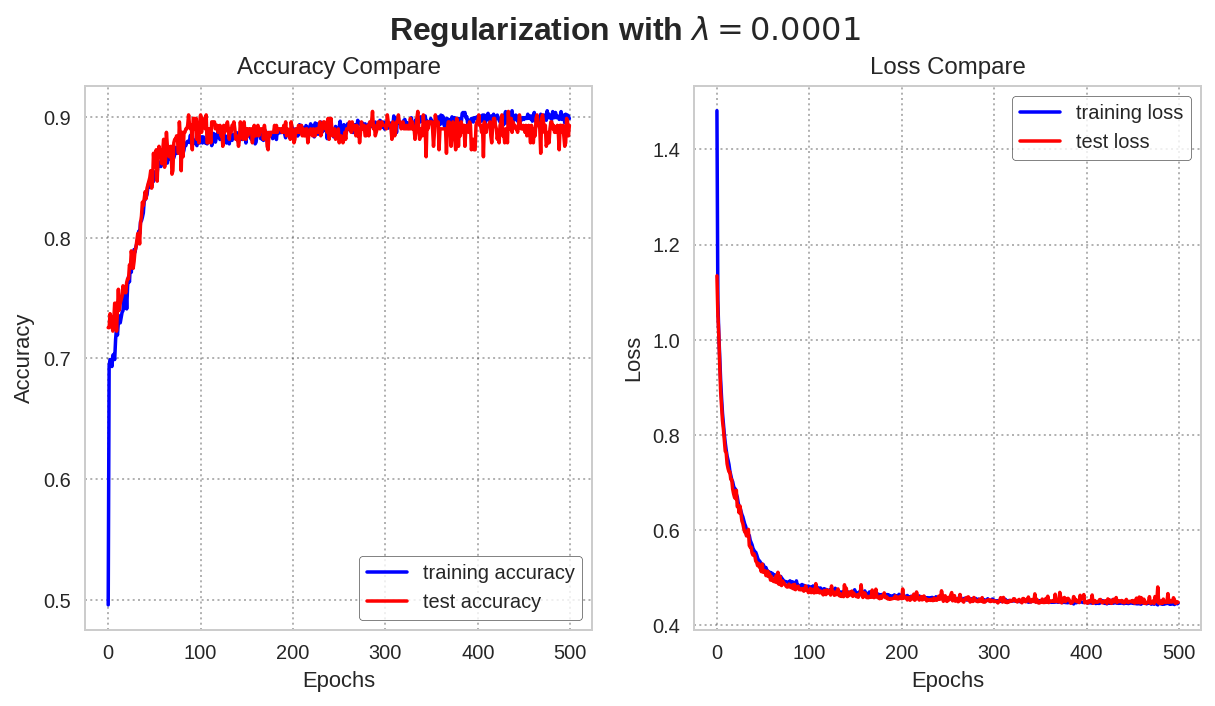

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_2.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_2.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_2.history.history['loss'],color='b',label='training loss')
ax2.plot(model_2.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Regularization with $\lambda=0.0001$',fontsize=16, fontweight='bold')
plt.show()

In [38]:
model_4_train_score = model_4.evaluate(X_train,y_train,verbose=0)
model_4_score = model_4.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_4_train_score[0])
print("Test loss: ",model_4_score[0])
print("Train accuracy: %.4f%%"% (model_4_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_4_score[1]*100))

Train loss:  0.07531094359161195
Test loss:  0.09538061227757118
Train accuracy: 98.2634%
Test accuracy: 96.8208%


In [39]:
y_pred_class_4 = model_4.predict_classes(X_test,verbose=0)
y_test_class_4= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_4,y_pred_class_4))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       251
          1       0.95      0.89      0.92        64
          2       0.85      0.85      0.85        13
          3       1.00      1.00      1.00        18

avg / total       0.97      0.97      0.97       346



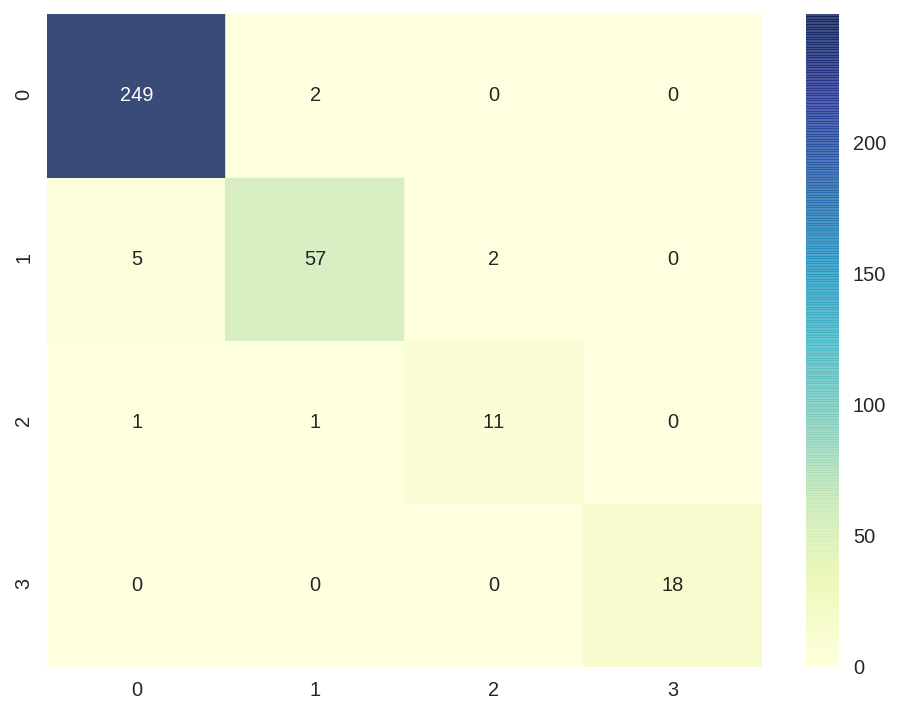

In [40]:
plot_confusion_matrix(model_4, X_test, y_test_class_4)

## 4. Summary

In [41]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
Total params: 524
Trainable params: 524
Non-trainable params: 0
_________________________________________________________________


In [0]:
index = {'Train loss':pd.Series([0.124,0.442,0.166,0.0753], index=['x=0','x=0.01','x=0.001','x=0.0001']),
        'Test loss':pd.Series([0.170,0.447,0.192,0.0953], index=['x=0','x=0.01','x=0.001','x=0.0001']),
        'Train accuracy':pd.Series(['95.2967%','90.1592%','96.5268%','98.2634%'], index=['x=0','x=0.01','x=0.001','x=0.0001']),
        'Test accuracy':pd.Series(['92.7746%','89.3064%','94.2197%','96.8208%'], index=['x=0','x=0.01','x=0.001','x=0.0001'])}

In [43]:
df = pd.DataFrame(index)
df

,Test accuracy,Test loss,Train accuracy,Train loss
x=0,92.7746%,0.1700,95.2967%,0.1240
x=0.01,89.3064%,0.4470,90.1592%,0.4420
x=0.001,94.2197%,0.1920,96.5268%,0.1660
x=0.0001,96.8208%,0.0953,98.2634%,0.0753


## 5. Plot the results


In [0]:
colors = sns.color_palette("husl", 8)

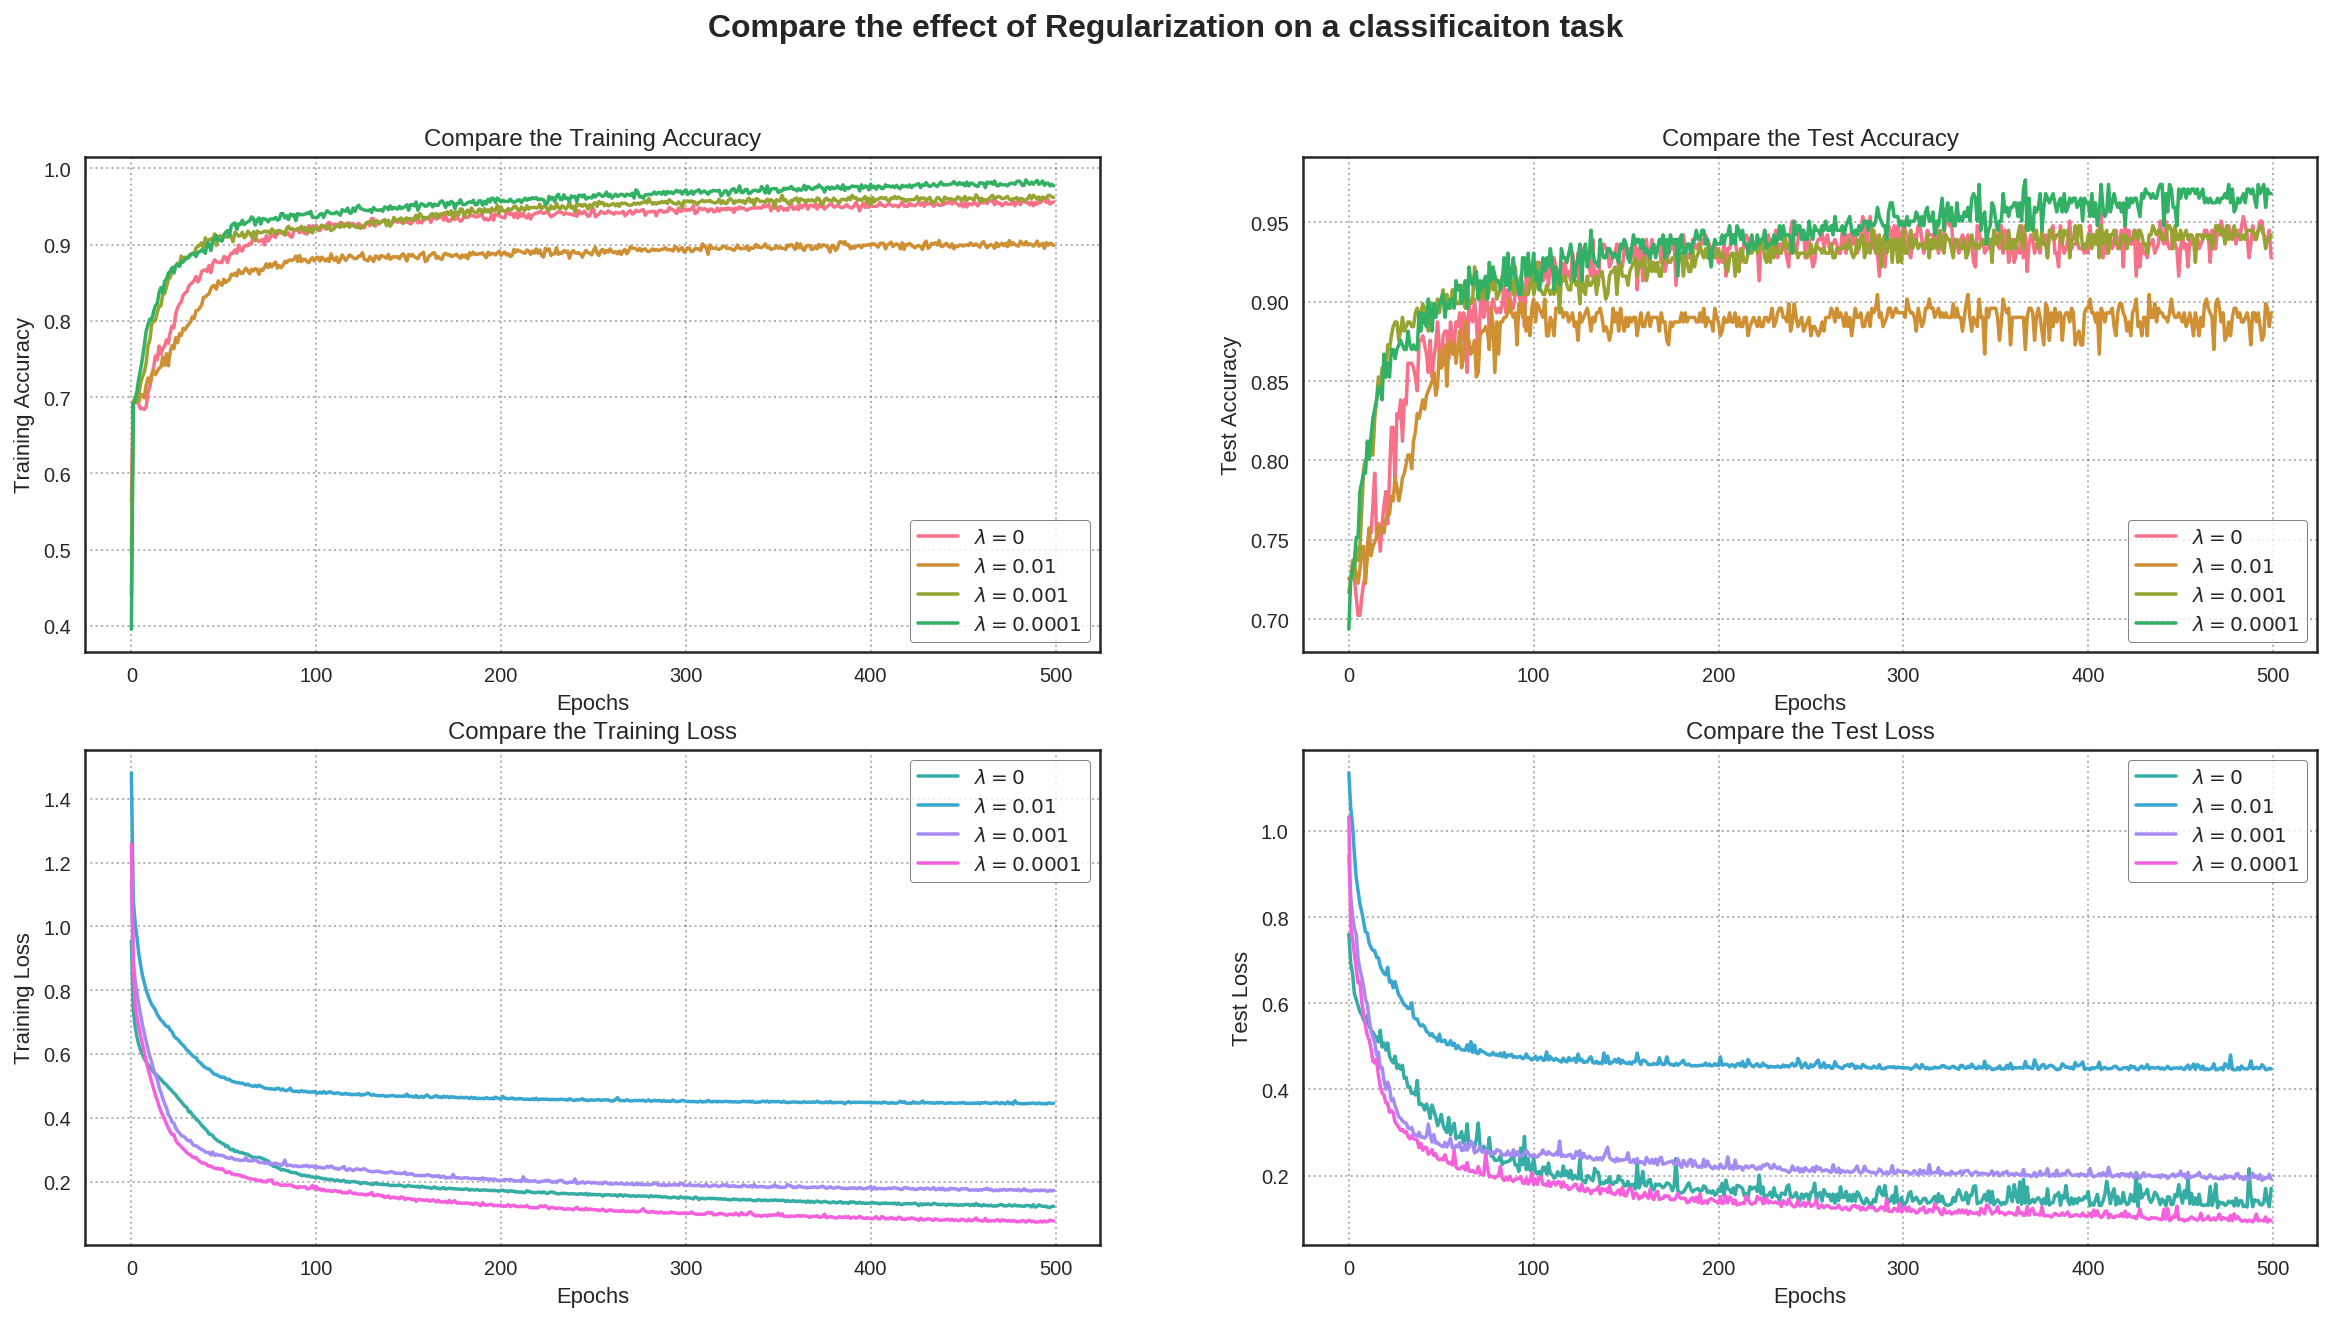

In [56]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1.history.history['acc'],color=colors[0],label='$\lambda=0$')
ax1.plot(model_2.history.history['acc'],color=colors[1],label='$\lambda=0.01$')
ax1.plot(model_3.history.history['acc'],color=colors[2],label='$\lambda=0.001$')
ax1.plot(model_4.history.history['acc'],color=colors[3],label='$\lambda=0.0001$')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy')


ax2.plot(model_1.history.history['val_acc'],color=colors[0],label='$\lambda=0$')
ax2.plot(model_2.history.history['val_acc'],color=colors[1],label='$\lambda=0.01$')
ax2.plot(model_3.history.history['val_acc'],color=colors[2],label='$\lambda=0.001$')
ax2.plot(model_4.history.history['val_acc'],color=colors[3],label='$\lambda=0.0001$')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy')


ax3.plot(model_1.history.history['loss'],color=colors[4],label='$\lambda=0$')
ax3.plot(model_2.history.history['loss'],color=colors[5],label='$\lambda=0.01$')
ax3.plot(model_3.history.history['loss'],color=colors[6],label='$\lambda=0.001$')
ax3.plot(model_4.history.history['loss'],color=colors[7],label='$\lambda=0.0001$')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')


ax4.plot(model_1.history.history['val_loss'],color=colors[4],label='$\lambda=0$')
ax4.plot(model_2.history.history['val_loss'],color=colors[5],label='$\lambda=0.01$')
ax4.plot(model_3.history.history['val_loss'],color=colors[6],label='$\lambda=0.001$')
ax4.plot(model_4.history.history['val_loss'],color=colors[7],label='$\lambda=0.0001$')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

fig.suptitle('Compare the effect of Regularization on a classificaiton task',fontsize=16, fontweight='bold')
plt.show()